# 7506 - Trabajo Práctico 2

---

## Introducción

### Librerías

In [133]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import sklearn as sk
from joblib import load
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

### Carga de datasets

In [2]:
# Dataset Train preprocesado
ds_train = pd.read_csv('datasets/tp1-train.csv')
ds_train.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,GaA1Loss98RkxbEZq2wZpQ==,2021-08-30,2022-01-27,-34.551623,-58.491771,Saavedra,Departamento,1.0,1.0,37.0,33.0,90000.0,Departamento - 1 amb divisible-Saavedra,2432.432432,Medio
1,Tp+fdnNQpNzXUFo7W3q3vA==,2021-01-11,2021-02-11,-34.576289,-58.463635,Villa Ortuzar,PH,3.0,2.0,144.0,144.0,214600.0,Venta PH 3 ambientes patio y gran terraza sin ...,1490.277778,Medio
2,CR+neBgmAEDSo9LxI0x5iw==,2021-04-12,2021-06-05,-34.600150,-58.378244,San Nicolás,Departamento,2.0,1.0,46.0,41.0,63000.0,Departamento - San Nicolas,1369.565217,Bajo
3,chtUpatpDQQL247Lt+Np2g==,2021-01-16,9999-12-31,-34.641450,-58.372804,Barracas,Departamento,4.0,3.0,65.0,65.0,102000.0,Departamento - Barracas,1569.230769,Bajo
4,q6JgVplw0pYiAx/nlX/EVQ==,2021-03-24,2021-06-05,-34.629050,-58.468088,Flores,Casa,5.0,4.0,215.0,155.0,285000.0,Casa - Excelente propiedas en Flores unica por...,1325.581395,Medio


In [3]:
# Dataset Test preprocesado
ds_test = pd.read_csv('datasets/tp1-test.csv')
ds_test.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,GrZ64pCxiOhtCZq4KgqxoQ==,2021-05-07,2021-05-08,-34.565080,-58.464190,Belgrano,Departamento,2.0,1.0,48.0,37.0,120000.0,Loft de dos ambientes con balcón y patio!,2500.000000,Medio
1,OHosCWo/KF1eK/6CmBdUQw==,2021-08-24,2021-08-24,-34.593059,-58.406758,Barrio Norte,Departamento,3.0,2.0,122.0,97.0,295000.0,"DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA",2418.032787,Medio
2,Y8K7ZUBw9NZCyJoQ3p5/ww==,2021-07-21,2021-11-28,-34.563755,-58.439019,Palermo,PH,2.0,1.0,44.0,35.0,95000.0,LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR,2159.090909,Alto
3,/G46ns24536LY6XTnM7F3Q==,2021-02-05,2021-02-05,-34.590534,-58.411562,Palermo,Departamento,3.0,2.0,106.0,93.0,235000.0,"Departamento 3 Ambientes con dependencia, baño...",2216.981132,Medio
4,bjEF6kjPBNijD/SWCGXs1Q==,2021-01-21,2021-03-17,-34.609729,-58.421587,Almagro,Departamento,1.0,1.0,25.0,25.0,50000.0,BME. MITRE Y MEDRANO - Almagro,2000.000000,Medio


## Procesamiento del lenguaje natural

### Ampliación del dataset

Este dataset incluye descripciones de las propiedades del otro dataset. Veremos como podemos extraer información de estas descripciones.

In [4]:
descriptions_dataset = pd.read_csv('datasets/properati_argentina_2021_decrip.csv')
descriptions_dataset.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
1,zuHOGgUE0UB71W7m/YCLoA==,¡HERMOSO PH TIPO CASA DE 2 AMBIENTES!<br>APTO ...
2,TUL813tXchVBlHUsfaA6DA==,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3,gn55JPmcjftBV/at1a7fPg==,"UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,..."
4,qg4m3QHcuo1+wMmyp7kx3Q==,Ph 2 Amb. Villa Crespo exclusivo uso profesion...


Tomaremos las descripciones correspondientes a los datasets de train y test

In [5]:
descriptions_train = descriptions_dataset[descriptions_dataset.id.isin(ds_train.id)].copy()
descriptions_test = descriptions_dataset[descriptions_dataset.id.isin(ds_test.id)].copy()
descriptions_train.shape, descriptions_test.shape

((69715, 2), (10648, 2))

#### Análisis de sentimientos - Tecnica Minqing Hu y Bing Liu

Una forma de analizar el sentimiento de un de un texto es considerando su sentimiento como la suma de los sentimientos de cada una de las palabras que lo forman.

Para el analisis de sentimiento nos guiamos del analisis realizado en esta pagina: https://www.cienciadedatos.net/documentos/py25-text-mining-python.html

Utilizamos algunas funciones de tokenizacion y limpieza de ahi con alguna sutil modificacion para nuestro caso de uso en particular.

In [6]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte todo el texto a minúsculas
    nuevo_texto = str(texto).lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\¡\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep=' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return (nuevo_texto)

In [7]:
# se aplica la función de limpieza a train y test y tokenización a cada descripcion

tokenized_train = pd.concat(
    [descriptions_train.id, descriptions_train['property_description'].apply(limpiar_tokenizar)], axis=1)
tokenized_test = pd.concat([descriptions_test.id, descriptions_test['property_description'].apply(limpiar_tokenizar)],
                           axis=1)
tokenized_train.head()

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,"[corredor, responsable, maria, alejandra, geno..."
3,gn55JPmcjftBV/at1a7fPg==,"[unico, ph, de, dormitorios, en, impecable, es..."
11,uH5H+RfQM87Qtrb13+T4hA==,"[venta, ph, ambientes, paternal, br, br, cálid..."
13,47t2G764+Gk5EkoUiVc7Qg==,"[ph, al, frente, super, luminoso, br, baño, co..."
15,lRVjhy5UZA9SOOLnfLJ6jA==,"[permuta, ventan, ph, de, ambientes, nuevo, as..."


Separamos los tokens según ids tanto en train como en test.

In [8]:
tokens_train = tokenized_train.explode(column='property_description')
tokens_train = tokens_train.rename(columns={'property_description': 'token'})
tokens_train.reset_index(inplace=True, drop=True)
tokens_train.head()

,id,token
0,BZCeiGkJr1WBUi6pKJQwJQ==,corredor
1,BZCeiGkJr1WBUi6pKJQwJQ==,responsable
2,BZCeiGkJr1WBUi6pKJQwJQ==,maria
3,BZCeiGkJr1WBUi6pKJQwJQ==,alejandra
4,BZCeiGkJr1WBUi6pKJQwJQ==,genoveva


In [9]:
# Replicamos en test.
tokens_test = tokenized_test.explode(column='property_description')
tokens_test = tokens_test.rename(columns={'property_description': 'token'})
tokens_test.reset_index(inplace=True, drop=True)

In [10]:
tokens_train.shape, tokens_test.shape

((13008054, 2), (1969939, 2))

Vemos que tenemos 11 millones de palabras en train y 3 millones en test

Notamos que las preposiciones no son relevantes para entender que atributo podria ser mejor para expandir el datast, asi que decidimos agregarlas como stopwords.

Tampoco van a variar mucho el analisis de sentimiento realizado en este trabajo.

In [11]:
## listado de stopwords

preposiciones = ["a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia",
                 "hasta", "mediante", "para", "por", "según", "sin", "sobre", "tras", "vía"]

stop_words = []

stop_words += preposiciones

# filtrado para excluir stopwords
tokens_train = tokens_train[~(tokens_train["token"].isin(stop_words))]

tokens_test = tokens_test[~(tokens_test["token"].isin(stop_words))]

Agregamos un lexicon en español de esta pagina: https://github.com/jboscomendoza/lexicos-nrc-afinn

In [12]:
# lexicon sentimientos
lexicon = pd.read_csv('datasets/lexico_nrc.csv')
lexicon

,palabra,sentimiento,word
0,ciegamente,negativo,blindly
1,ciegamente,tristeza,blindly
2,a distancia,negativo,aloof
3,a hurtadillas,sorpresa,stealthily
4,a la deriva,anticipación,adrift
...,...,...,...
15302,zumbido,anticipación,buzz
15303,zumbido,miedo,buzz
15304,zumbido,positivo,buzz
15305,zumbido,negativo,drone


In [13]:
def mappear_valores_sentimiento(s):
    # 1 Positivo
    # 0 Neutro
    # -1 Negativo
    sentimiento_numerico = 0
    if str(s) in ['negativo', 'tristeza', 'miedo', 'enfado', 'tristeza', 'asco']:
        sentimiento_numerico = -1
    if str(s) in ['sorpresa', 'positivo', 'confianza', 'alegría']:
        sentimiento_numerico = 1
    if str(s) in ['anticipación']:
        sentimiento_numerico = 0

    return sentimiento_numerico


In [14]:
lexicon['sentimiento'] = lexicon['sentimiento'].apply(lambda x: mappear_valores_sentimiento(x))
lexicon[['sentimiento']].head()

,sentimiento
0,-1
1,-1
2,-1
3,1
4,0


In [15]:
tokens_train[tokens_train.token.isin(lexicon.palabra)].shape, tokens_test[tokens_test.token.isin(lexicon.palabra)].shape

((1519675, 2), (229226, 2))

In [16]:
lexicon

,palabra,sentimiento,word
0,ciegamente,-1,blindly
1,ciegamente,-1,blindly
2,a distancia,-1,aloof
3,a hurtadillas,1,stealthily
4,a la deriva,0,adrift
...,...,...,...
15302,zumbido,0,buzz
15303,zumbido,-1,buzz
15304,zumbido,1,buzz
15305,zumbido,-1,drone


Tenemos un millon y medio de coincidencias con el lexicón en train. Usaremos estos sentimientos para puntuar las propiedades

In [17]:
# sentimiento promedio de cada descripcion
tokens_sentimientos_train = pd.merge(
    left=tokens_train,
    right=lexicon,
    left_on="token",
    right_on="palabra",
    how="inner"
)
tokens_sentimientos_train = tokens_sentimientos_train.drop(columns=["palabra", "word"])

tokens_sentimientos_test = pd.merge(
    left=tokens_test,
    right=lexicon,
    left_on="token",
    right_on="palabra",
    how="inner"
)
tokens_sentimientos_test = tokens_sentimientos_test.drop(columns=["palabra", "word"])

tokens_sentimientos_train.head()

,id,token,sentimiento
0,BZCeiGkJr1WBUi6pKJQwJQ==,responsable,1
1,BZCeiGkJr1WBUi6pKJQwJQ==,responsable,1
2,BZCeiGkJr1WBUi6pKJQwJQ==,responsable,1
3,eMMPT/INpeI16EUBN74N3Q==,responsable,1
4,eMMPT/INpeI16EUBN74N3Q==,responsable,1


Ahora calcularemos el puntaje para cada propiedad como la suma de los sentimientos.

In [18]:
score_train = tokens_sentimientos_train[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()

score_test = tokens_sentimientos_test[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()

In [19]:
score_train

,id,sentimiento
0,+++LrfX9dl/rsnbNTgVaSw==,24
1,++20Jf3Ha2Epz88cJxEmJw==,10
2,++2AcJNn9KYBeuOard+DZw==,18
3,++5o0X5nwMy3BtfAvsFAaA==,-2
4,++A4JS7xH+YdAXktJ3bHlg==,28
...,...,...
69137,zzbbKVUtPLels9Algy3FRw==,4
69138,zzifKawPn7V8Z63LI9+K9Q==,16
69139,zziqoG25k9M8rIgzpKwFwg==,29
69140,zzrpS8TqDA6px1h/DuQdmw==,20


In [20]:
score_train.sentimiento.max()

216

La mejor propiedad tiene un puntaje de 216. Analizaremos un poco las descripciones de las mejores y peores.

In [21]:
top5_positivas = score_train.sort_values(by='sentimiento', ascending=False).head(5)
top5_positivas

,id,sentimiento
64018,vJRa8QKk0d9i9L4Rk6Bvng==,216
27404,NX8OeQx/kxiBz8ehRtMggw==,185
28810,Ordgp/sLvmhD+RwAtErcvw==,185
49104,hWcrJ6XkTCTGVo80jBvI1g==,185
20561,HApisqgDT/EcQsf/Z9pwSA==,185


In [22]:
descriptions_train.property_description.iloc[top5_positivas.index]

432928    Ubicación piso 9 al frente.<br><br>Amplio y lu...
182346    Hermoso departamento tipo Loft de dos Ambiente...
191949    Corredor Responsable: María Eugenia Blanco CUC...
330753    Corredor Responsable: Gustavo Guastello - C.U....
137409    MALABIA Y SANTA FE<br>48.78m2 TOTALES.<br><br>...
Name: property_description, dtype: object

In [23]:
score_train.sentimiento.min()

-37

In [24]:
top5_negativas = score_train.sort_values(by='sentimiento').head(5)
top5_negativas

,id,sentimiento
24240,KWFIk6SR8JFrfLNsfJcoPg==,-37
67484,yTzDOa/iBUD6x1xW0p+8jQ==,-24
67054,y6+EaqbgQiNEm0O9xuj5qA==,-23
62615,u/IcqZ+M9BeXX58mOBAsXw==,-23
67571,yZ1q8SipMwHAKNK0xa1ApQ==,-22


In [25]:
descriptions_train.iloc[top5_negativas.index].property_description

161869    PH EN VENTA DE 4 AMBIENTES CON PATIO Y TERRAZA...
448955    Corredor Responsable: Gustavo Guastello CUCICB...
447362    Corredor Responsable: Brian Ezequiel Roldán CP...
424224    Corredor Responsable: Veronica Grela Reina - C...
449321    Corredor Responsable: Marcelo Trujillo CUCICBA...
Name: property_description, dtype: object

descriptions_test.head()Como es claro, la gente que publica la venta de una propiedad va a tratar de expresar la mejor publicacion y descripcion posible. Es por eso que tenemos una tasa altisima de positividad. No buscamos hacer un analisis tan profundo de las descripciones sino crear un puntaje relativamente estandarizado para poder usar la descripción como feature.

In [26]:
def perfil_sentimientos(title, df):
    print(title)
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")


perfil_sentimientos("Train: ", score_train)
print()
perfil_sentimientos("Test: ", score_test)

Train: 
Positivos: 93.61
Neutros  : 1.57
Negativos: 4.82

Test: 
Positivos: 93.22
Neutros  : 1.75
Negativos: 5.03


Finalmente, agregaremos nuestro puntaje como columnas nuevas del dataset.

In [27]:
ds_test

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio
0,GrZ64pCxiOhtCZq4KgqxoQ==,2021-05-07,2021-05-08,-34.565080,-58.464190,Belgrano,Departamento,2.0,1.0,48.0,37.0,120000.0,Loft de dos ambientes con balcón y patio!,2500.000000,Medio
1,OHosCWo/KF1eK/6CmBdUQw==,2021-08-24,2021-08-24,-34.593059,-58.406758,Barrio Norte,Departamento,3.0,2.0,122.0,97.0,295000.0,"DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA",2418.032787,Medio
2,Y8K7ZUBw9NZCyJoQ3p5/ww==,2021-07-21,2021-11-28,-34.563755,-58.439019,Palermo,PH,2.0,1.0,44.0,35.0,95000.0,LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR,2159.090909,Alto
3,/G46ns24536LY6XTnM7F3Q==,2021-02-05,2021-02-05,-34.590534,-58.411562,Palermo,Departamento,3.0,2.0,106.0,93.0,235000.0,"Departamento 3 Ambientes con dependencia, baño...",2216.981132,Medio
4,bjEF6kjPBNijD/SWCGXs1Q==,2021-01-21,2021-03-17,-34.609729,-58.421587,Almagro,Departamento,1.0,1.0,25.0,25.0,50000.0,BME. MITRE Y MEDRANO - Almagro,2000.000000,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,EbpZ5Tl0YDy0iRaybU3wFg==,2021-02-11,2021-04-05,-34.595230,-58.409301,Recoleta,Departamento,3.0,2.0,73.0,73.0,149000.0,3 AMBIENTES C/DEPENDENCIA · AGÜERO AL 1200 · R...,2041.095890,Medio
10644,eovjcfaKV44yRtidCOWjqg==,2021-01-22,2021-06-30,-34.581910,-58.449381,Palermo,Departamento,2.0,1.0,54.0,50.0,139797.0,Venta - Maure 3552 4º N Jardin,2588.833333,Medio
10645,WkBPu8yo/qD8xtp4m2Xtow==,2021-12-16,2022-02-09,-34.573555,-58.440367,Palermo,Departamento,1.0,1.0,26.0,26.0,54000.0,MONOAMBIENTE VENTA PALERMO BAJAS EXP,2076.923077,Medio
10646,DQrbC5hmTRl079aLUroCxA==,2021-10-02,2021-10-07,-34.624851,-58.434546,Caballito,Departamento,4.0,3.0,111.0,76.0,255000.0,VENTA DEPARTAMENTO CABALLITO 4 AMBIENTES PATIOS,2297.297297,Medio


In [28]:
ds_train = pd.merge(ds_train, score_train, on='id')
ds_train.rename(columns={'sentimiento': 'score_sentimientos'}, inplace=True)
ds_test = pd.merge(ds_test, score_test, on='id')
ds_test.rename(columns={'sentimiento': 'score_sentimientos'}, inplace=True)

In [29]:
ds_train.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio,score_sentimientos
0,GaA1Loss98RkxbEZq2wZpQ==,2021-08-30,2022-01-27,-34.551623,-58.491771,Saavedra,Departamento,1.0,1.0,37.0,33.0,90000.0,Departamento - 1 amb divisible-Saavedra,2432.432432,Medio,5
1,Tp+fdnNQpNzXUFo7W3q3vA==,2021-01-11,2021-02-11,-34.576289,-58.463635,Villa Ortuzar,PH,3.0,2.0,144.0,144.0,214600.0,Venta PH 3 ambientes patio y gran terraza sin ...,1490.277778,Medio,35
2,CR+neBgmAEDSo9LxI0x5iw==,2021-04-12,2021-06-05,-34.600150,-58.378244,San Nicolás,Departamento,2.0,1.0,46.0,41.0,63000.0,Departamento - San Nicolas,1369.565217,Bajo,17
3,chtUpatpDQQL247Lt+Np2g==,2021-01-16,9999-12-31,-34.641450,-58.372804,Barracas,Departamento,4.0,3.0,65.0,65.0,102000.0,Departamento - Barracas,1569.230769,Bajo,9
4,q6JgVplw0pYiAx/nlX/EVQ==,2021-03-24,2021-06-05,-34.629050,-58.468088,Flores,Casa,5.0,4.0,215.0,155.0,285000.0,Casa - Excelente propiedas en Flores unica por...,1325.581395,Medio,33


#### Tecnica Regex

Revisamos las siguientes paginas para entender cuales son los ammenities mas buscados en CABA, y en Argentina en general.

https://www.iprofesional.com/negocios/371702-cuales-son-los-amenities-mas-exoticos-de-edificios-en-argentina

https://www.baenegocios.com/sociedad/Ranking-de-amenities-los-servicios-que-mas-pesan-al-comprar-una-propiedad-20220119-0068.html

https://www.forbesargentina.com/negocios/amenities-servicios-mas-demandados-argentinos-comprar-una-propiedad-n11901

Dichos ammenities parecen hacer que la propiedad cotice entre un 15% y un 20% más que el precio de venta.

Sacando un promedio y haciendo un top-5 ranking, podemos notar que los mas relevantes son:

- Garage/Estacionamiento
- Pileta
- Jardin/Espacio al aire libre
- Parrilla
- SUM (Gimnasio/Spa/Sauna)

Al buscar estos datos, podriamos tratar de entender si el precio resulta mayor, contra una propiedad de similares caracteristicas pero sin estos ammenities y a partir de eso, entender que % varía del precio de venta original.

In [30]:
def calculate_freq(feature, regex):
    freq = descriptions_train.property_description.str.contains(regex, regex=True).sum()
    print(
        f"Los anuncios de propiedades que tienen la feature {feature} son: {freq} y representan el {freq * 100 // len(descriptions_train)}% de los datos")

##### Amenities

In [31]:
garage = re.compile(r"\s*garage|garaje|estacionamiento|parking")
calculate_freq("Garage", garage)

Los anuncios de propiedades que tienen la feature Garage son: 1476 y representan el 2% de los datos


In [32]:
pileta = re.compile(r"\s*pileta")
calculate_freq("Pileta", pileta)

Los anuncios de propiedades que tienen la feature Pileta son: 4618 y representan el 6% de los datos


In [33]:
jardin = re.compile(r"\s*jardin|espacio verde")
calculate_freq("Jardín", jardin)

Los anuncios de propiedades que tienen la feature Jardín son: 1455 y representan el 2% de los datos


In [34]:
parrilla = re.compile(r"\s*parrilla|bbq")
calculate_freq("Parrilla", parrilla)

Los anuncios de propiedades que tienen la feature Parrilla son: 12823 y representan el 18% de los datos


In [35]:
sum = re.compile(r"\s*zoom|sum|gimansio|spa")
calculate_freq("SUM", sum)

Los anuncios de propiedades que tienen la feature SUM son: 26309 y representan el 37% de los datos


In [36]:
balcon = re.compile(r"\s*balcon|balcón")
calculate_freq("Balcón", balcon)

Los anuncios de propiedades que tienen la feature Balcón son: 32860 y representan el 47% de los datos


Otro aspecto interesante que dejamos fuera del análisis es a que tipo de vivienda pertenece cada ammenity. Y si donde encontramos una amenity en particular, encontramos consecuentemente otra. Por ejemplo, una casa con jardin y parrila y/o pileta. De esta manera podriamos tratar de determinar el costo de cada ammenity o como afecta al precio.

Por último, construiremos columnas booleanas para los mejores features y las agregaremos a nuestros datasets. Usaremos parrilla, sum, balcón y pileta.

In [37]:
amenities_train = pd.DataFrame({
    'id': descriptions_train.id,
    'pileta': descriptions_train.property_description.str.contains(pileta, regex=True),
    'parrilla': descriptions_train.property_description.str.contains(parrilla, regex=True),
    'balcon': descriptions_train.property_description.str.contains(balcon, regex=True),
    'sum': descriptions_train.property_description.str.contains(sum, regex=True)
})
amenities_train.replace([True, False], [1, 0], inplace= True)
amenities_train.head(10)

,id,pileta,parrilla,balcon,sum
0,BZCeiGkJr1WBUi6pKJQwJQ==,0,0,0,0
3,gn55JPmcjftBV/at1a7fPg==,0,0,0,0
11,uH5H+RfQM87Qtrb13+T4hA==,0,0,0,0
13,47t2G764+Gk5EkoUiVc7Qg==,0,0,0,0
15,lRVjhy5UZA9SOOLnfLJ6jA==,0,0,0,0
16,n7NJmavbeNUlyKufoGRr+g==,0,0,0,0
153,lZyClw0vqQvUiJkIemcg8A==,0,0,1,1
154,AZJX5ab3sBKZK1bSC3zW9A==,0,0,0,0
231,r//Xlyvc3OKSuYyZAp7zWA==,0,0,1,1
232,eMMPT/INpeI16EUBN74N3Q==,0,0,0,1


In [38]:
# Replicamos lo mismo en test
amenities_test = pd.DataFrame({
    'id': descriptions_test.id,
    'pileta': descriptions_test.property_description.str.contains(pileta, regex=True),
    'parrilla': descriptions_test.property_description.str.contains(parrilla, regex=True),
    'balcon': descriptions_test.property_description.str.contains(balcon, regex=True),
    'sum': descriptions_test.property_description.str.contains(sum, regex=True)
})
amenities_test.replace([True, False], [1, 0], inplace= True)
amenities_test.head()

,id,pileta,parrilla,balcon,sum
2,TUL813tXchVBlHUsfaA6DA==,0,1,1,0
151,ns8QWxBXYIdnEccdiu3qog==,0,0,0,0
208,boCXaj+OYbucoJeinbtaOg==,0,0,1,1
239,MAewqGlr+bEVCoz1BmrrVA==,0,0,1,1
241,kIh1t01TEOIAa0g1Wkd4kQ==,0,0,0,0


In [39]:
ds_test

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio,score_sentimientos
0,GrZ64pCxiOhtCZq4KgqxoQ==,2021-05-07,2021-05-08,-34.565080,-58.464190,Belgrano,Departamento,2.0,1.0,48.0,37.0,120000.0,Loft de dos ambientes con balcón y patio!,2500.000000,Medio,11
1,OHosCWo/KF1eK/6CmBdUQw==,2021-08-24,2021-08-24,-34.593059,-58.406758,Barrio Norte,Departamento,3.0,2.0,122.0,97.0,295000.0,"DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA",2418.032787,Medio,26
2,Y8K7ZUBw9NZCyJoQ3p5/ww==,2021-07-21,2021-11-28,-34.563755,-58.439019,Palermo,PH,2.0,1.0,44.0,35.0,95000.0,LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR,2159.090909,Alto,22
3,/G46ns24536LY6XTnM7F3Q==,2021-02-05,2021-02-05,-34.590534,-58.411562,Palermo,Departamento,3.0,2.0,106.0,93.0,235000.0,"Departamento 3 Ambientes con dependencia, baño...",2216.981132,Medio,17
4,bjEF6kjPBNijD/SWCGXs1Q==,2021-01-21,2021-03-17,-34.609729,-58.421587,Almagro,Departamento,1.0,1.0,25.0,25.0,50000.0,BME. MITRE Y MEDRANO - Almagro,2000.000000,Medio,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10553,EbpZ5Tl0YDy0iRaybU3wFg==,2021-02-11,2021-04-05,-34.595230,-58.409301,Recoleta,Departamento,3.0,2.0,73.0,73.0,149000.0,3 AMBIENTES C/DEPENDENCIA · AGÜERO AL 1200 · R...,2041.095890,Medio,30
10554,eovjcfaKV44yRtidCOWjqg==,2021-01-22,2021-06-30,-34.581910,-58.449381,Palermo,Departamento,2.0,1.0,54.0,50.0,139797.0,Venta - Maure 3552 4º N Jardin,2588.833333,Medio,0
10555,WkBPu8yo/qD8xtp4m2Xtow==,2021-12-16,2022-02-09,-34.573555,-58.440367,Palermo,Departamento,1.0,1.0,26.0,26.0,54000.0,MONOAMBIENTE VENTA PALERMO BAJAS EXP,2076.923077,Medio,37
10556,DQrbC5hmTRl079aLUroCxA==,2021-10-02,2021-10-07,-34.624851,-58.434546,Caballito,Departamento,4.0,3.0,111.0,76.0,255000.0,VENTA DEPARTAMENTO CABALLITO 4 AMBIENTES PATIOS,2297.297297,Medio,40


In [40]:
ds_train = pd.merge(ds_train, amenities_train, on='id')
ds_train.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio,score_sentimientos,pileta,parrilla,balcon,sum
0,GaA1Loss98RkxbEZq2wZpQ==,2021-08-30,2022-01-27,-34.551623,-58.491771,Saavedra,Departamento,1.0,1.0,37.0,33.0,90000.0,Departamento - 1 amb divisible-Saavedra,2432.432432,Medio,5,0,0,0,0
1,Tp+fdnNQpNzXUFo7W3q3vA==,2021-01-11,2021-02-11,-34.576289,-58.463635,Villa Ortuzar,PH,3.0,2.0,144.0,144.0,214600.0,Venta PH 3 ambientes patio y gran terraza sin ...,1490.277778,Medio,35,0,0,0,1
2,CR+neBgmAEDSo9LxI0x5iw==,2021-04-12,2021-06-05,-34.600150,-58.378244,San Nicolás,Departamento,2.0,1.0,46.0,41.0,63000.0,Departamento - San Nicolas,1369.565217,Bajo,17,0,0,0,1
3,chtUpatpDQQL247Lt+Np2g==,2021-01-16,9999-12-31,-34.641450,-58.372804,Barracas,Departamento,4.0,3.0,65.0,65.0,102000.0,Departamento - Barracas,1569.230769,Bajo,9,0,0,1,1
4,q6JgVplw0pYiAx/nlX/EVQ==,2021-03-24,2021-06-05,-34.629050,-58.468088,Flores,Casa,5.0,4.0,215.0,155.0,285000.0,Casa - Excelente propiedas en Flores unica por...,1325.581395,Medio,33,0,1,0,1


In [41]:
ds_test = pd.merge(ds_test, amenities_test, on='id')
ds_test.head()

,id,start_date,end_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,pxm2,tipo_precio,score_sentimientos,pileta,parrilla,balcon,sum
0,GrZ64pCxiOhtCZq4KgqxoQ==,2021-05-07,2021-05-08,-34.565080,-58.464190,Belgrano,Departamento,2.0,1.0,48.0,37.0,120000.0,Loft de dos ambientes con balcón y patio!,2500.000000,Medio,11,1,1,1,1
1,OHosCWo/KF1eK/6CmBdUQw==,2021-08-24,2021-08-24,-34.593059,-58.406758,Barrio Norte,Departamento,3.0,2.0,122.0,97.0,295000.0,"DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA",2418.032787,Medio,26,0,0,1,1
2,Y8K7ZUBw9NZCyJoQ3p5/ww==,2021-07-21,2021-11-28,-34.563755,-58.439019,Palermo,PH,2.0,1.0,44.0,35.0,95000.0,LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR,2159.090909,Alto,22,0,0,0,0
3,/G46ns24536LY6XTnM7F3Q==,2021-02-05,2021-02-05,-34.590534,-58.411562,Palermo,Departamento,3.0,2.0,106.0,93.0,235000.0,"Departamento 3 Ambientes con dependencia, baño...",2216.981132,Medio,17,0,0,1,1
4,bjEF6kjPBNijD/SWCGXs1Q==,2021-01-21,2021-03-17,-34.609729,-58.421587,Almagro,Departamento,1.0,1.0,25.0,25.0,50000.0,BME. MITRE Y MEDRANO - Almagro,2000.000000,Medio,5,0,0,0,0


##### Expensas

Por último, trabajaremos en crear una columna numérica con el valor de las expensas. Evaluaremos primero que porcentaje de valores podemos conseguir con regex

Armé varias regex para probar algunas cosas, lo que quería probar:
- Conseguir cosas como "15000 de expensas", "expensas: 15000", "sin expensas"

Solo contar la aparicion de la paalbra expensas como en los casos anteriores no sirve porque hay mucho "sin expensas" y mucho dato falopa
Dejo las regex que use:

In [42]:
re.compile(r"\s*[0-9.]*\s*exp|expensas")
re.compile('((?:[a-zA-Z0-9]+\s*){5}(?:expensas|exp)\s(?:[a-zA-Z0-9]+\s){10})')
re.compile('((?:[0-9a-zA-Z,.]+\s*){5}?(?:con|sin|de)\s*(?:expensas|exp))')
re.compile('\s*([0-9.]+)\s*exp|expensas')


# así se usa para extraer
# descriptions_train.property_description.str.extract(sin_expensas)

re.compile(r'\s*([0-9.]+)\s*exp|expensas', re.UNICODE)

## Modelos

#### Selección de features

Para entrenar los modelos usaremos nuestro dataset recien generado, descartaremos el id, el título y las fechas. Convertiremos las categóricas en variables numéricas. También dejaremos aparte dos OHE del barrio y el tipo para usar luego.

In [43]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'latitud', 'longitud', 'place_l3',
       'property_type', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'property_price',
       'property_title', 'pxm2', 'tipo_precio', 'score_sentimientos', 'pileta',
       'parrilla', 'balcon', 'sum'],
      dtype='object')

In [44]:
ds_trabajo_train = ds_train.drop(['id', 'property_title', 'start_date', 'end_date'], axis=1)
ohe_property_type_train = pd.get_dummies(ds_train['property_type'], prefix='property_type')
ohe_place_l3_train = pd.get_dummies(ds_train['place_l3'], prefix='place_l3')
ds_trabajo_train['place_l3'] = pd.factorize(ds_train['place_l3'])[0]
ds_trabajo_train['property_type'] = pd.factorize(ds_train['property_type'])[0]
ds_trabajo_train

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,pxm2,tipo_precio,score_sentimientos,pileta,parrilla,balcon,sum
0,-34.551623,-58.491771,0,0,1.0,1.0,37.0,33.0,90000.0,2432.432432,Medio,5,0,0,0,0
1,-34.576289,-58.463635,1,1,3.0,2.0,144.0,144.0,214600.0,1490.277778,Medio,35,0,0,0,1
2,-34.600150,-58.378244,2,0,2.0,1.0,46.0,41.0,63000.0,1369.565217,Bajo,17,0,0,0,1
3,-34.641450,-58.372804,3,0,4.0,3.0,65.0,65.0,102000.0,1569.230769,Bajo,9,0,0,1,1
4,-34.629050,-58.468088,4,2,5.0,4.0,215.0,155.0,285000.0,1325.581395,Medio,33,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69137,-34.608522,-58.430410,10,0,4.0,3.0,103.0,94.0,205000.0,1990.291262,Medio,13,0,0,1,0
69138,-34.625448,-58.524920,45,2,6.0,5.0,300.0,200.0,400000.0,1333.333333,Medio,9,0,0,0,0
69139,-34.558831,-58.462175,8,0,4.0,3.0,129.0,114.0,289000.0,2240.310078,Medio,54,0,0,1,0
69140,-34.604841,-58.495192,34,0,3.0,2.0,64.0,46.0,120000.0,1875.000000,Bajo,3,0,0,0,0


In [45]:
## Replicamos en test
ds_trabajo_test = ds_test.drop(['id', 'property_title', 'start_date', 'end_date'], axis=1)
ohe_property_type_test = pd.get_dummies(ds_train['property_type'], prefix='property_type')
ohe_place_l3_test = pd.get_dummies(ds_train['place_l3'], prefix='place_l3')
ds_trabajo_test['place_l3'] = pd.factorize(ds_test['place_l3'])[0]
ds_trabajo_test['property_type'] = pd.factorize(ds_test['property_type'])[0]
ds_trabajo_test

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,pxm2,tipo_precio,score_sentimientos,pileta,parrilla,balcon,sum
0,-34.565080,-58.464190,0,0,2.0,1.0,48.0,37.0,120000.0,2500.000000,Medio,11,1,1,1,1
1,-34.593059,-58.406758,1,0,3.0,2.0,122.0,97.0,295000.0,2418.032787,Medio,26,0,0,1,1
2,-34.563755,-58.439019,2,1,2.0,1.0,44.0,35.0,95000.0,2159.090909,Alto,22,0,0,0,0
3,-34.590534,-58.411562,2,0,3.0,2.0,106.0,93.0,235000.0,2216.981132,Medio,17,0,0,1,1
4,-34.609729,-58.421587,3,0,1.0,1.0,25.0,25.0,50000.0,2000.000000,Medio,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10553,-34.595230,-58.409301,17,0,3.0,2.0,73.0,73.0,149000.0,2041.095890,Medio,30,0,0,0,0
10554,-34.581910,-58.449381,2,0,2.0,1.0,54.0,50.0,139797.0,2588.833333,Medio,0,0,0,0,0
10555,-34.573555,-58.440367,2,0,1.0,1.0,26.0,26.0,54000.0,2076.923077,Medio,37,0,0,0,0
10556,-34.624851,-58.434546,4,0,4.0,3.0,111.0,76.0,255000.0,2297.297297,Medio,40,0,1,0,1


In [46]:
ds_trabajo_train.shape, ds_trabajo_test.shape

((69142, 16), (10558, 16))

Sacamos la variable target y creamos nuestros datasets de entrenamiento

In [47]:
columnas_predictoras = ds_trabajo_train.columns.to_list()
columnas_predictoras.remove('property_price')
columnas_predictoras.remove('pxm2')
columnas_predictoras.remove('tipo_precio')
columnas_predictoras

['latitud',
 'longitud',
 'place_l3',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'score_sentimientos',
 'pileta',
 'parrilla',
 'balcon',
 'sum']

In [124]:
x_train_tp1 = ds_trabajo_train.loc[:, ['latitud',
                                       'longitud',
                                       'place_l3',
                                       'property_type',
                                       'property_rooms',
                                       'property_bedrooms',
                                       'property_surface_total',
                                       'property_surface_covered']]
x_train = ds_trabajo_train.loc[:, columnas_predictoras]

x_test_tp1 = ds_trabajo_test.loc[:, ['latitud',
                                     'longitud',
                                     'place_l3',
                                     'property_type',
                                     'property_rooms',
                                     'property_bedrooms',
                                     'property_surface_total',
                                     'property_surface_covered']]
x_test = ds_trabajo_test.loc[:, columnas_predictoras]

y_train = ds_trabajo_train.property_price
y_train_clasificacion = ds_trabajo_train.tipo_precio
y_test = ds_trabajo_test.property_price
y_test_clasificacion = ds_trabajo_test.tipo_precio

Exportamos los dataset de train y test:

In [49]:
pd.concat([x_train, y_train], axis=1).to_csv('datasets/train.csv')
pd.concat([x_test, y_test], axis=1).to_csv('datasets/test.csv')

In [50]:
x_train

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,score_sentimientos,pileta,parrilla,balcon,sum
0,-34.551623,-58.491771,0,0,1.0,1.0,37.0,33.0,5,0,0,0,0
1,-34.576289,-58.463635,1,1,3.0,2.0,144.0,144.0,35,0,0,0,1
2,-34.600150,-58.378244,2,0,2.0,1.0,46.0,41.0,17,0,0,0,1
3,-34.641450,-58.372804,3,0,4.0,3.0,65.0,65.0,9,0,0,1,1
4,-34.629050,-58.468088,4,2,5.0,4.0,215.0,155.0,33,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69137,-34.608522,-58.430410,10,0,4.0,3.0,103.0,94.0,13,0,0,1,0
69138,-34.625448,-58.524920,45,2,6.0,5.0,300.0,200.0,9,0,0,0,0
69139,-34.558831,-58.462175,8,0,4.0,3.0,129.0,114.0,54,0,0,1,0
69140,-34.604841,-58.495192,34,0,3.0,2.0,64.0,46.0,3,0,0,0,0


Como todas las features que tenemos están en escalas completamente diferentes y no pueden compararse, normalizaremos el dataset

In [51]:
sscaler = StandardScaler()
x_train_tp1_transform = sscaler.fit_transform(pd.DataFrame(x_train_tp1))
x_test_tp1_transform = sscaler.fit_transform(pd.DataFrame(x_test_tp1))
x_train_transform = sscaler.fit_transform(pd.DataFrame(x_train))
x_test_transform = sscaler.fit_transform(pd.DataFrame(x_test))

In [52]:
# A partir de acá, cada parte se puede ejecutar individualmente.

#### XGBoost - Regresión

best_xgb_tp1 es el arbol que tiene los mejores hiper parametros y estimaodores obtenidos en el TP1.

In [53]:
def regression_metrics(title, real, predicted):
    mse = sk.metrics.mean_squared_error(y_true=real, y_pred=predicted)
    rmse = sk.metrics.mean_squared_error(y_true=real, y_pred=predicted, squared=False)
    r2 = sk.metrics.r2_score(y_true=real, y_pred=predicted)

    print(title)
    print(f"El error (mse) es: {mse}")
    print(f"El error (rmse) es: {rmse}")
    print(f"El error (r²) es: {r2}\n")

In [54]:
best_xgb_tp1 = load('models/XGBoost.joblib')

##### Metricas obtenidas con el dataset del TP1.

Metricas XGBoost optimizado - Train

El error (mse) es: 761704416.3937123

El error (rmse) es: 27598.993032241455

El error (r²) es: 0.9652453545965177

---------------------------------------

Metricas XGBoost optimizado - Test

El error (mse) es: 3287902738.8784523

El error (rmse) es: 57340.23664825994

El error (r²) es: 0.8477123168506954

In [55]:
best_xgb_tp1.fit(x_train_tp1_transform, y_train)
y_pred = best_xgb_tp1.predict(x_train_tp1_transform)
y_pred_test = best_xgb_tp1.predict(x_test_tp1_transform)

regression_metrics("Metricas XGBoost optimizado - Train", y_train, y_pred)
regression_metrics("Metricas XGBoost optimizado - Test", y_test, y_pred_test)

Metricas XGBoost optimizado - Train
El error (mse) es: 434248515.17446923
El error (rmse) es: 20838.63035745078
El error (r²) es: 0.9799330735989964

Metricas XGBoost optimizado - Test
El error (mse) es: 3103350379.6449485
El error (rmse) es: 55707.72280074773
El error (r²) es: 0.835644415110878



Utilizamos esta pagina como soporte para entender mejor que representa cada metrica de error: 

https://sitiobigdata.com/2018/08/27/machine-learning-metricas-regresion-mse/

**Train**

Notamos como el modelo con el dataset expandido mejora significativamente.

Podemos observar un delta de **MSE** de: 432564299. Esto significa que el error se redujo un 400%. Esto es relevante ya que esta metrica nos dice sobre cuan bueno es realmente el modelo entrenado.

Luego, para **RMSE** tenemos un delta de: 9456. Esto significa que el error se redujo un 65%.

Finalmente para **R2** obtuvimos un delta de: -0,19. Esto significa que el modelo mejoró un 20%, ya que, mientras mas tengamos un valor mas cercano a uno, tenemos un modelo con un error cercano a cero.

**Test**

Notamos como el modelo con el dataset expandido mejora significativamente.

Podemos observar un delta de **MSE** de: -96136560337. Esto significa que el error en test empeoró un 3%. 

Luego, para **RMSE** tenemos un delta de: -257976,21245748526. Esto significa que el error empeoró un 550%.

Finalmente para **R2** obtuvimos un delta de: 0,52. Esto significa que el modelo empeoró un 52%.

##### Nuevos Hiperparametros optimizados con el nuevo dataset ampliado.

In [56]:
from xgboost import XGBRegressor

#Cantidad de combinaciones que quiero porbar
n = 10

params = {
    "max_depth": [3, 12, 4],
    "learning_rate": [0.02, 0.03, 0.06],
    "min_child_weight": [2, 12, 2],
    "n_estimators": [100, 350],
    'alpha': np.linspace(0.03, 0.09, n),
}

kfold = KFold(n_splits=5)

search_regressor = XGBRegressor()

search = RandomizedSearchCV(search_regressor, params, cv=5, random_state=9, n_iter=10, verbose=10000)

search.fit(x_train_transform, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 1/5; 1/10] END alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100;, score=0.855 total time=   1.9s
[CV 2/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 2/5; 1/10] END alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100;, score=0.847 total time=   2.0s
[CV 3/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 3/5; 1/10] END alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100;, score=0.859 total time=   2.0s
[CV 4/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 4/5; 1/10

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'alpha': array([0.03      , 0.03666667, 0.04333333, 0.05      , 0.05666667,
       0.06333333, 0.07      , 0.07666667, 0.08333333, 0.09      ]),
                                        'learning_rate': [0.02, 0.03, 0.06],
                                        'max_depth': [3, 12, 4],
                                        'min_child_weight': [2, 12, 2],
                                        'n_estimators': [100, 350]},
                   random_state=9, verbose=10000)

In [57]:
# Mejores Hiperparámetros
search.best_params_

{'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 12,
 'learning_rate': 0.03,
 'alpha': 0.056666666666666664}

In [58]:
# Mejor Metrica
search.best_score_

0.8984505174511689

In [59]:
best_xgb = search.best_estimator_
best_xgb.fit(x_train_transform, y_train)
y_pred = best_xgb.predict(x_train_transform)
y_pred_test = best_xgb.predict(x_test)

In [60]:
regression_metrics("Metricas XGBoost optimizado - Train", y_train, y_pred)
regression_metrics("Metricas XGBoost optimizado - Test", y_test, y_pred_test)

Metricas XGBoost optimizado - Train
El error (mse) es: 943337112.7586652
El error (rmse) es: 30713.793526014742
El error (r²) es: 0.9564077348532607

Metricas XGBoost optimizado - Test
El error (mse) es: 499446100837.8422
El error (rmse) es: 706715.0068010741
El error (r²) es: -25.451011320605847



**Train**

Notamos como el modelo con el dataset sigue teniendo muy buenos resultados para el dataset de Train pero con una leve baja.

Con respecto a las metricas obtenidas con el dataset del TP1, podemos observar un delta de **MSE** de: 617388041. Esto significa que el error, en comparacion con las metricas anteriores se incrementó un 287%.

Luego, para **RMSE** tenemos un delta de: 12623. Esto significa que el error se redujo un 3%.

Finalmente para **R2** obtuvimos un delta de: -0,02. Esto significa que el modelo empeoró un 2%.

**Test**

Notamos como el modelo con el dataset expandido y la busqueda de un nuevo arbol con mejores hiper-parametros, resulto en un pequeño detrimento del dataset de train pero mejoró mucho mas el dataset de test.

Con respecto a las metricas obtenidas con el dataset del TP1, podemos observar un delta de **MSE** de: 45032742345. Esto significa que el error en test mejoró un 54%. 

Luego, para **RMSE** tenemos un delta de: 82096. Esto significa que el error mejoró un 73%.

Finalmente para **R2** obtuvimos un delta de: -9795260413860356. Esto significa que el modelo mejoró un 405%.

----------------------------------------------------

Como **conclusion**, notamos que el dataset expandido nos mejora el modelo con el dataset de train un 20% pero para el dataset de test, nos lo empeora un 52%.

Cuando hicimos la busqueda de mejores hiper-parametros para el nuevo dataset expandido, logramos balancear estos resultados.

Finalmente, haciendo el delta final, el resultado de expandir el dataset nos resulto en una mejora del 18% para el dataset de train y en un 353% de mejora en el dataset de test.

### Redes Neuronales

#### Regresión

Usaremos el dataset del tp1 normalizado

In [61]:
x_train_tp1_transform

array([[ 1.69055357, -1.38688097, -1.42715246, ..., -0.89302878,
        -0.74362371, -0.76083791],
       [ 0.75601611, -0.632713  , -1.33880823, ...,  0.16994113,
         1.01016177,  1.45219119],
       [-0.1479955 ,  1.65619914, -1.250464  , ..., -0.89302878,
        -0.59610904, -0.60134032],
       ...,
       [ 1.41747656, -0.59357242, -0.72039862, ...,  1.23291103,
         0.76430399,  0.85407521],
       [-0.32574788, -1.47858875,  1.57655134, ...,  0.16994113,
        -0.30107971, -0.50165432],
       [-1.23142875, -0.62059586, -1.07377554, ...,  1.23291103,
         1.35436266,  1.03351001]])

Predecir el precio de la propiedad y utilizar como métrica de evaluación el error cuadrático medio.

Vamos a predecir el precio de la propiedad (dolares) en base a la superifice total y cubierta. Ya que como vimos en el trabajo pasado, eran los atributos que mas se correlacionaban con el precio.

(Todas columnas tienen que ser numericas para Redes Neuronales)

In [62]:
def regression_scatter(x, y_true, y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    fig.suptitle(f"Precio según {x.name}")
    sns.scatterplot(x=x, y=y_true, ax=ax1)
    ax1.set_title(f"{x.name} vs Precio real")

    sns.scatterplot(x=x, y=y_pred, ax=ax2)
    ax2.set_title(f"{x.name} vs Precio predicho")

    sns.scatterplot(x=x, y=y_true, ax=ax3)
    sns.scatterplot(x=x, y=y_pred, ax=ax3)
    ax3.set_title(f"Grafico combinado");

##### Construcción del modelo

In [63]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Error [MSE]')
    plt.grid(True)

###### Modelo base

In [64]:
d_in = x_train_tp1_transform.shape[1]
d_out = 1


def base_model_builder():
    model = keras.Sequential([
        keras.layers.Dense(d_in, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(d_out, kernel_initializer='normal', activation='relu')])
    model.compile(loss='mean_squared_error', optimizer='adam')
    print(model.summary())
    return model

In [65]:
base_model = base_model_builder()
base_history = base_model.fit(
    x_train_tp1_transform,
    y_train,
    epochs=1000,
    batch_size=1000,
    validation_split=0.33,
    verbose=0,
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None


2022-12-06 16:17:58.939100: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


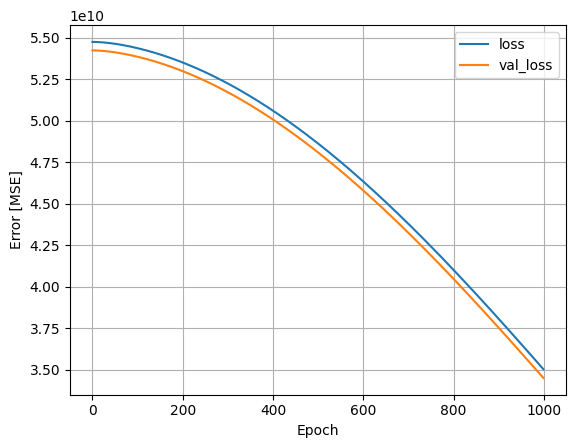

In [66]:
plot_loss(base_history)

Evaluamos la predicción inicial para train

In [67]:
def plot_prices_dist(y_pred, y_pred_test):
    precios_train = pd.concat([y_train, pd.DataFrame(y_pred, columns=['predicted'])], axis=1)
    precios_test = pd.concat([y_test, pd.DataFrame(y_pred_test, columns=['predicted'])], axis=1)
    fig, axs = plt.subplots(1, 3, figsize=(25, 5))

    fig.suptitle("Distribución de precios reales y predichos")

    axs[0].set_xlabel("Precio")
    axs[0].set_ylabel("Densidad")
    axs[0].set_title("Train")
    sns.kdeplot(precios_train['property_price'], ax=axs[0])
    sns.kdeplot(precios_train['predicted'], ax=axs[0])
    axs[0].legend(labels=['Real', 'Predicho'])

    axs[1].set_xlabel("Precio")
    axs[1].set_ylabel("Densidad")
    axs[1].set_title("Test")
    sns.kdeplot(precios_test['property_price'], ax=axs[1])
    sns.kdeplot(precios_test['predicted'], ax=axs[1])
    axs[1].legend(labels=['Real', 'Predicho'])

    axs[2].set_xlabel("Precio Real")
    axs[2].set_ylabel("Precio Predicho")
    axs[2].set_title("Real vs predicho")
    sns.scatterplot(x=precios_train['property_price'], y=precios_train['predicted'], ax=axs[2])
    sns.regplot(x=precios_train['property_price'], y=precios_train['predicted'], scatter=False, ax=axs[2], fit_reg=True,
                color='darkgreen', ci=0)
    axs[2].legend(labels=['Real', 'Predicho'])

In [68]:
y_pred_base = base_model.predict(x_train_tp1_transform)
y_pred_test_base = base_model.predict(x_test_tp1_transform)

330/330 [==============================] - 0s 223us/step


Metricas Red Neuronal Base - Train
El error (mse) es: 34835737048.75942
El error (rmse) es: 186643.3418280958
El error (r²) es: -0.609783676983467

Metricas Red Neuronal Base - Test
El error (mse) es: 30147041599.278366
El error (rmse) es: 173629.03443628998
El error (r²) es: -0.5966081971359507



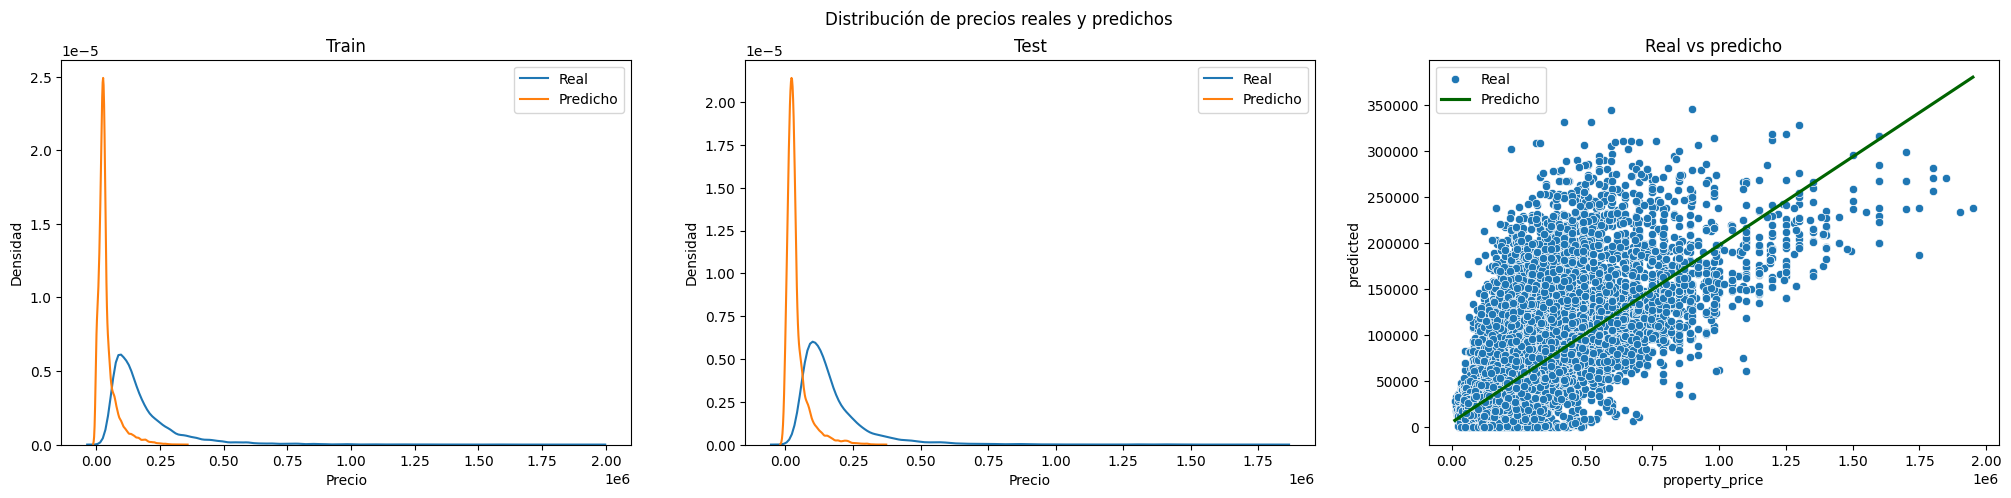

In [69]:
plot_prices_dist(y_pred_base, y_pred_test_base)
regression_metrics("Metricas Red Neuronal Base - Train", y_train, y_pred_base)
regression_metrics("Metricas Red Neuronal Base - Test", y_test, y_pred_test_base)

Vemos que hay mucha dispersión respecto a los precios reales, probaremos un modelo profundo con una capa intermedia con la mitad de las neuronas de la primera.

###### Modelo de 3 capas

In [70]:
def larger_model_builder():
    model = keras.Sequential([
        keras.layers.Dense(d_in, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(int(d_in / 2), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, kernel_initializer='normal', activation='relu')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [71]:
larger_model_builder().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [72]:
larger_model = larger_model_builder()
larger_history = larger_model.fit(
    x_train_tp1_transform,
    y_train,
    epochs=1000,
    batch_size=1000,
    validation_split=0.33,
)

Epoch 1/1000
47/47 [==============================] - 0s 2ms/step - loss: 54733934592.0000 - val_loss: 54222184448.0000
Epoch 2/1000
47/47 [==============================] - 0s 738us/step - loss: 54733864960.0000 - val_loss: 54222045184.0000
Epoch 3/1000
47/47 [==============================] - 0s 646us/step - loss: 54733611008.0000 - val_loss: 54221619200.0000
Epoch 4/1000
47/47 [==============================] - 0s 674us/step - loss: 54732947456.0000 - val_loss: 54220673024.0000
Epoch 5/1000
47/47 [==============================] - 0s 613us/step - loss: 54731681792.0000 - val_loss: 54218997760.0000
Epoch 6/1000
47/47 [==============================] - 0s 611us/step - loss: 54729584640.0000 - val_loss: 54216368128.0000
Epoch 7/1000
47/47 [==============================] - 0s 621us/step - loss: 54726418432.0000 - val_loss: 54212579328.0000
Epoch 8/1000
47/47 [==============================] - 0s 622us/step - loss: 54722002944.0000 - val_loss: 54207426560.0000
Epoch 9/1000
47/47 [======

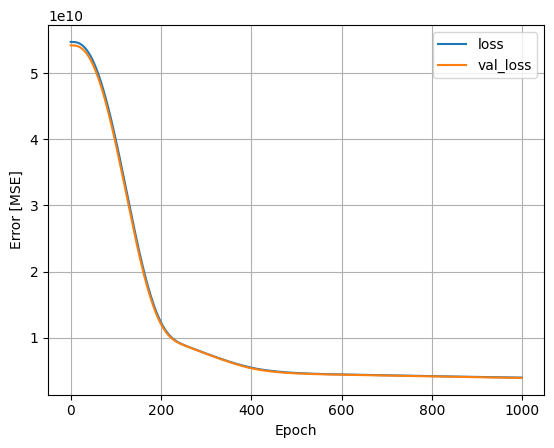

In [73]:
plot_loss(larger_history)

In [74]:
y_pred_larger = larger_model.predict(x_train_tp1_transform)
y_pred_larger_test = larger_model.predict(x_test_tp1_transform)

330/330 [==============================] - 0s 238us/step


Metricas Red Neuronal Profunda - Train
El error (mse) es: 3961122357.7557874
El error (rmse) es: 62937.44797619131
El error (r²) es: 0.8169537763726857

Metricas Red Neuronal Profunda - Test
El error (mse) es: 3623864133.6190367
El error (rmse) es: 60198.539298051386
El error (r²) es: 0.8080776462927751



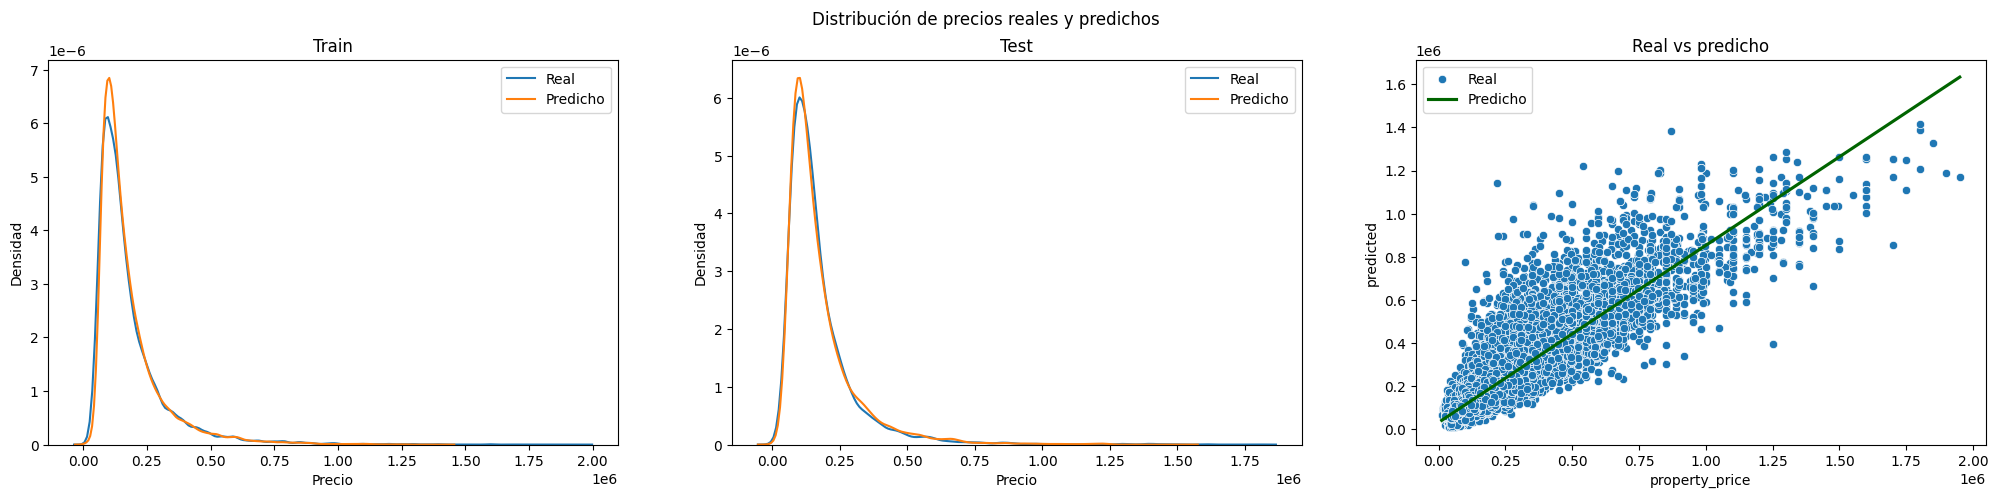

In [75]:
plot_prices_dist(y_pred_larger, y_pred_larger_test)
regression_metrics("Metricas Red Neuronal Profunda - Train", y_train, y_pred_larger)
regression_metrics("Metricas Red Neuronal Profunda - Test", y_test, y_pred_larger_test)

Por último, probaremos un tercer modelo con una capa inical más ancha.

###### Modelo ancho

In [76]:
def wider_model_builder():
    model = keras.Sequential([
        keras.layers.Dense(d_in * 2, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, kernel_initializer='normal', activation='relu')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [77]:
wider_model_builder().summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                144       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [78]:
wider_model = wider_model_builder()
wider_history = wider_model.fit(
    x_train_tp1_transform,
    y_train,
    epochs=1000,
    batch_size=1000,
    validation_split=0.33,
)

Epoch 1/1000
47/47 [==============================] - 0s 2ms/step - loss: 54733910016.0000 - val_loss: 54222110720.0000
Epoch 2/1000
47/47 [==============================] - 0s 704us/step - loss: 54733742080.0000 - val_loss: 54221848576.0000
Epoch 3/1000
47/47 [==============================] - 0s 631us/step - loss: 54733373440.0000 - val_loss: 54221336576.0000
Epoch 4/1000
47/47 [==============================] - 0s 623us/step - loss: 54732734464.0000 - val_loss: 54220562432.0000
Epoch 5/1000
47/47 [==============================] - 0s 590us/step - loss: 54731841536.0000 - val_loss: 54219550720.0000
Epoch 6/1000
47/47 [==============================] - 0s 587us/step - loss: 54730731520.0000 - val_loss: 54218293248.0000
Epoch 7/1000
47/47 [==============================] - 0s 580us/step - loss: 54729347072.0000 - val_loss: 54216790016.0000
Epoch 8/1000
47/47 [==============================] - 0s 609us/step - loss: 54727749632.0000 - val_loss: 54215069696.0000
Epoch 9/1000
47/47 [======

In [79]:
y_pred_wider = wider_model.predict(x_train_tp1_transform)
y_pred_wider_test = wider_model.predict(x_test_tp1_transform)

330/330 [==============================] - 0s 216us/step


Metricas Red Neuronal Profunda - Train
El error (mse) es: 18587787566.087173
El error (rmse) es: 136337.0366631429
El error (r²) es: 0.14104538757881757

Metricas Red Neuronal Profunda - Test
El error (mse) es: 15434248114.647726
El error (rmse) es: 124234.64941250379
El error (r²) es: 0.18259153305886833



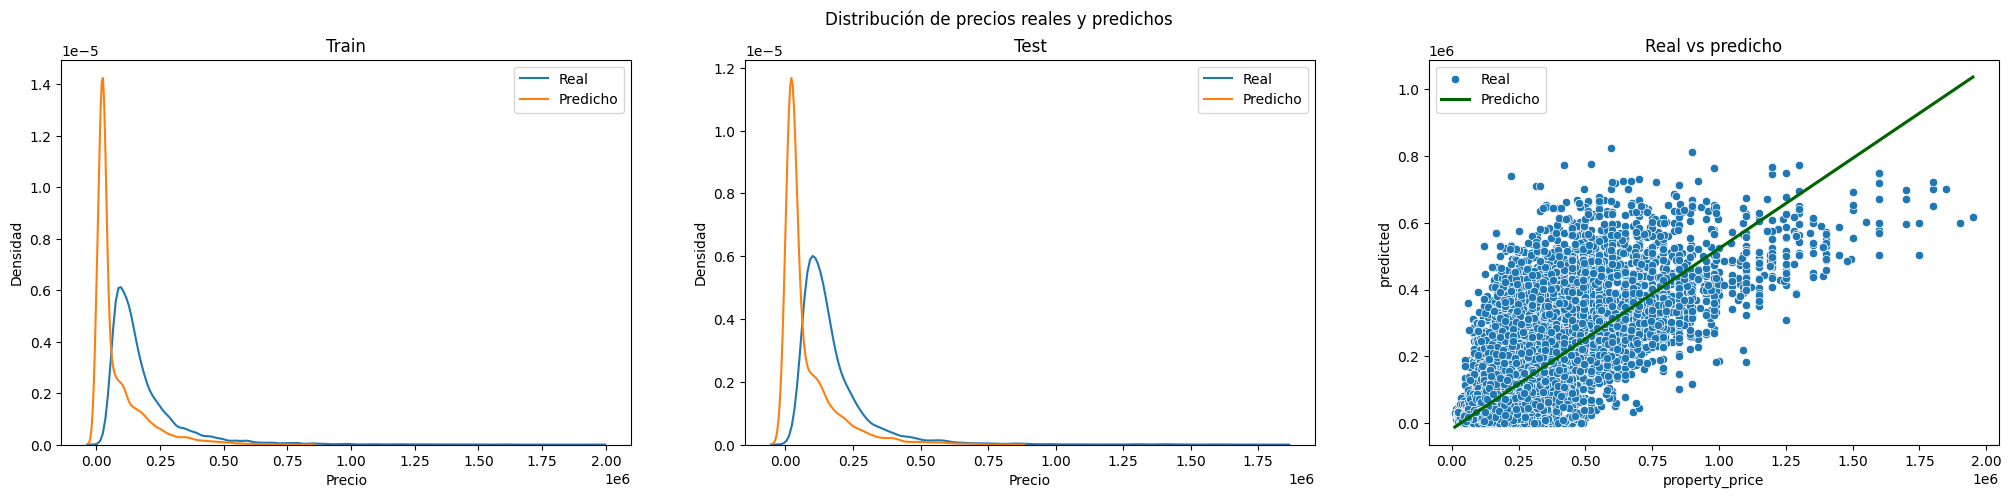

In [80]:
plot_prices_dist(y_pred_wider, y_pred_wider_test)
regression_metrics("Metricas Red Neuronal Profunda - Train", y_train, y_pred_wider)
regression_metrics("Metricas Red Neuronal Profunda - Test", y_test, y_pred_wider_test)

##### Análisis de métricas

Metricas Red Neuronal Profunda - Train
El error (mse) es: 3961122357.7557874
El error (rmse) es: 62937.44797619131
El error (r²) es: 0.8169537763726857

Metricas Red Neuronal Profunda - Test
El error (mse) es: 3623864133.6190367
El error (rmse) es: 60198.539298051386
El error (r²) es: 0.8080776462927751



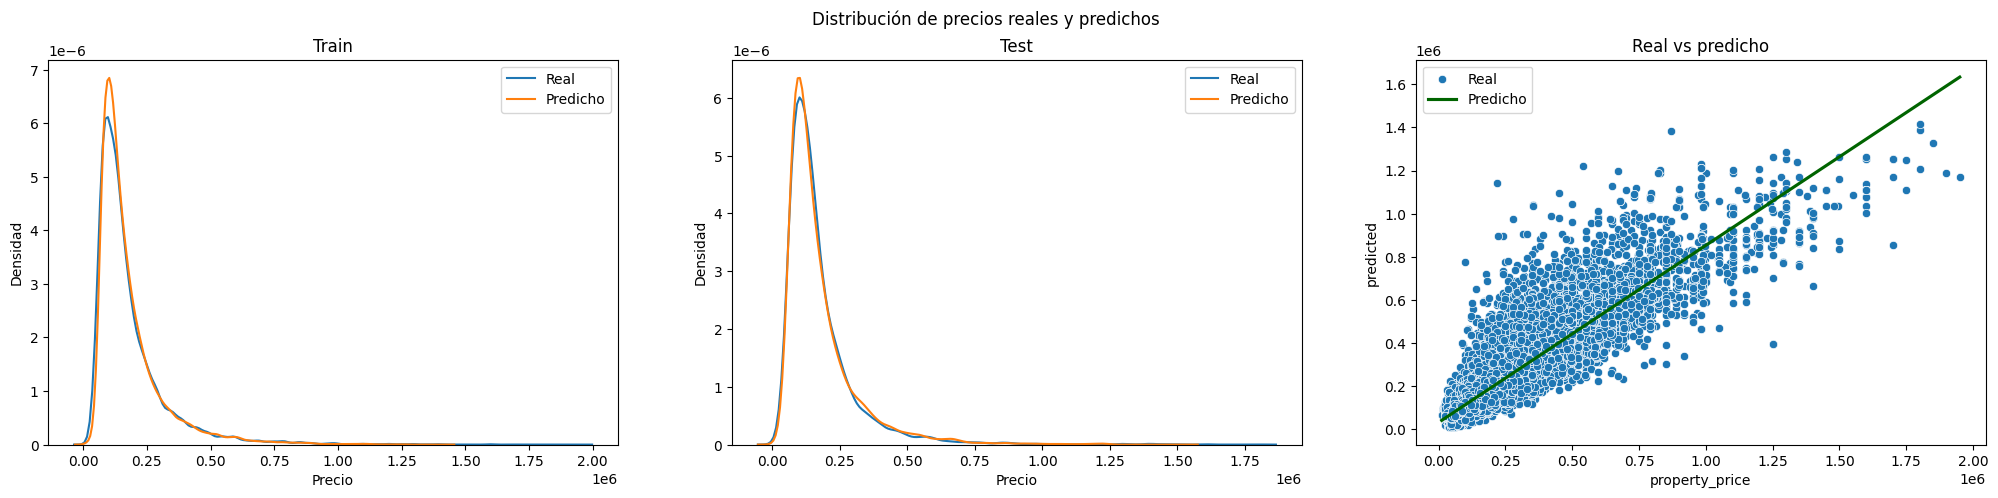

In [81]:
plot_prices_dist(y_pred_larger, y_pred_larger_test)
regression_metrics("Metricas Red Neuronal Profunda - Train", y_train, y_pred_larger)
regression_metrics("Metricas Red Neuronal Profunda - Test", y_test, y_pred_larger_test)

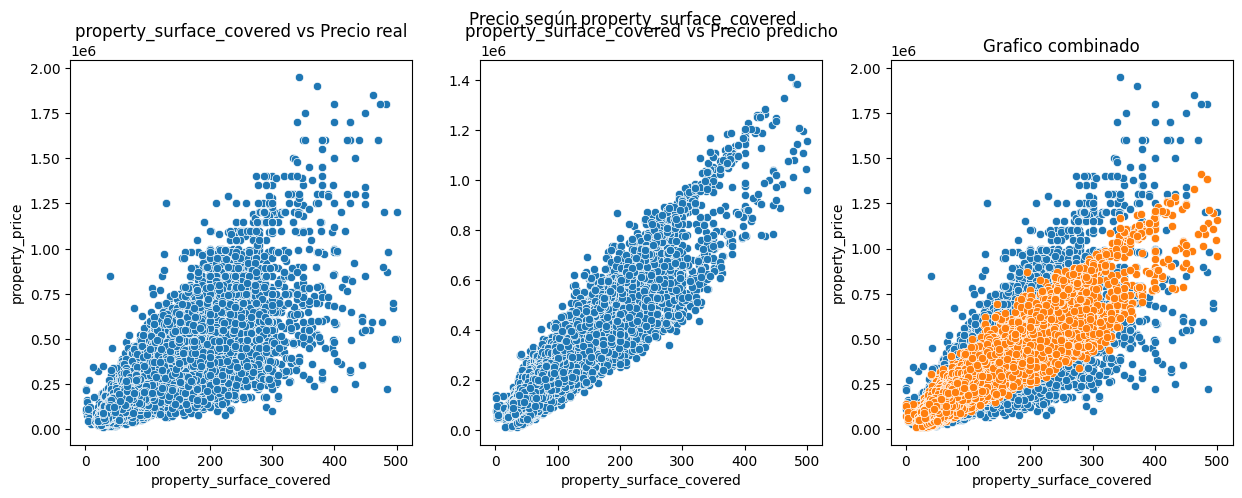

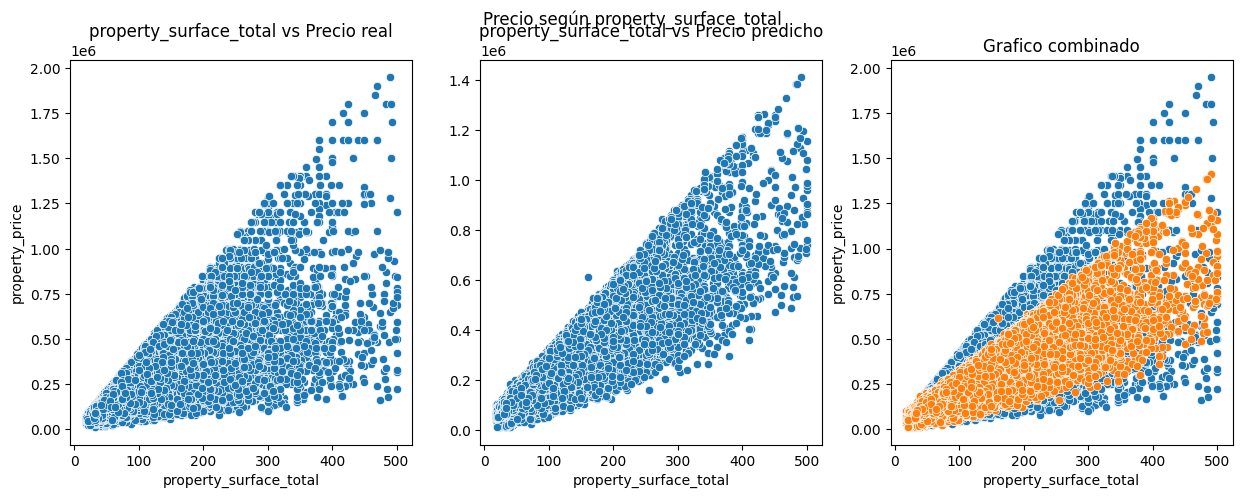

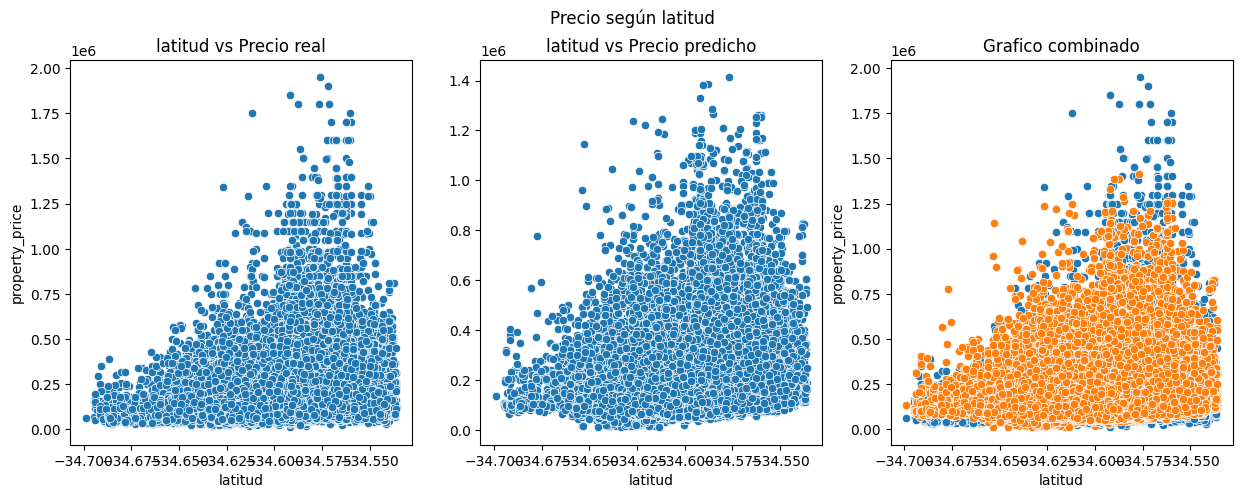

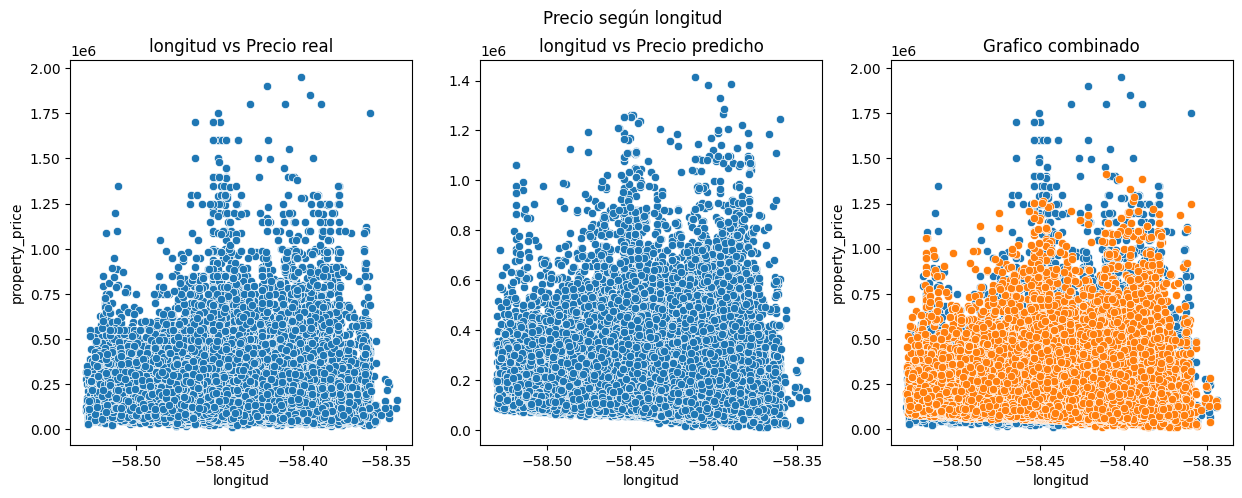

In [82]:
regression_scatter(ds_train.property_surface_covered, y_train, y_pred_larger[:, 0])
regression_scatter(ds_train.property_surface_total, y_train, y_pred_larger[:, 0])
regression_scatter(ds_train.latitud, y_train, y_pred_larger[:, 0])
regression_scatter(ds_train.longitud, y_train, y_pred_larger[:, 0])

Podemos ver que las predicciones mejoraron muchísimo y que los precios están cerca de los reales. Sin embargo, falta bastante para llegar a un buen resultado.

###### Cosas a probar para mejorar el modelo:
- Más capas intermedias
- Diferentes funciones de activación
- Usar otro escalado

#### Clasificación

In [83]:
def predicciones_clasificacion(modelo, x_train, x_test):
    # Predicciones Train
    output_modelo = modelo.predict(x_train)

    predicciones = np.argmax(output_modelo, axis=1).tolist()
    valores_esperados = np.argmax(y_train_encoded, axis=1).tolist()
    matriz_de_metricas = confusion_matrix(predicciones, valores_esperados)

    sns.heatmap(matriz_de_metricas, annot=True, cmap='Blues', fmt='g').set(
        title='Predicciones sobre el conjunto de entrenamiento')
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.show()
    print(classification_report(predicciones, valores_esperados))

    # Predicciones Test
    output_modelo = modelo.predict(x_test)

    predicciones = np.argmax(output_modelo, axis=1).tolist()
    valores_esperados = np.argmax(y_test_encoded, axis=1).tolist()
    matriz_de_metricas = confusion_matrix(predicciones, valores_esperados)

    sns.heatmap(matriz_de_metricas, annot=True, cmap='Blues', fmt='g').set(
        title='Predicciones sobre el conjunto de testeo')
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.show()
    print(classification_report(predicciones, valores_esperados))

##### Preparación del dataset

In [84]:
scaler = StandardScaler()
ohe = OneHotEncoder()

In [85]:
x_train_tp1

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered
0,-34.551623,-58.491771,0,0,1.0,1.0,37.0,33.0
1,-34.576289,-58.463635,1,1,3.0,2.0,144.0,144.0
2,-34.600150,-58.378244,2,0,2.0,1.0,46.0,41.0
3,-34.641450,-58.372804,3,0,4.0,3.0,65.0,65.0
4,-34.629050,-58.468088,4,2,5.0,4.0,215.0,155.0
...,...,...,...,...,...,...,...,...
69137,-34.608522,-58.430410,10,0,4.0,3.0,103.0,94.0
69138,-34.625448,-58.524920,45,2,6.0,5.0,300.0,200.0
69139,-34.558831,-58.462175,8,0,4.0,3.0,129.0,114.0
69140,-34.604841,-58.495192,34,0,3.0,2.0,64.0,46.0


In [86]:
x_train_clasificacion = x_train_tp1.drop(columns=['place_l3', 'property_type'])
# x_train_clasificacion = x_train_clasificacion.join(ohe_place_l3_train)
x_train_clasificacion = x_train_clasificacion.join(ohe_property_type_train)

x_test_clasificacion = x_test_tp1.drop(columns=['place_l3', 'property_type'])
# x_test_clasificacion = x_test_clasificacion.join(ohe_place_l3_train)
x_test_clasificacion = x_test_clasificacion.join(ohe_property_type_train)
x_train_clasificacion

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_type_Casa,property_type_Departamento,property_type_PH
0,-34.551623,-58.491771,1.0,1.0,37.0,33.0,0,1,0
1,-34.576289,-58.463635,3.0,2.0,144.0,144.0,0,0,1
2,-34.600150,-58.378244,2.0,1.0,46.0,41.0,0,1,0
3,-34.641450,-58.372804,4.0,3.0,65.0,65.0,0,1,0
4,-34.629050,-58.468088,5.0,4.0,215.0,155.0,1,0,0
...,...,...,...,...,...,...,...,...,...
69137,-34.608522,-58.430410,4.0,3.0,103.0,94.0,0,1,0
69138,-34.625448,-58.524920,6.0,5.0,300.0,200.0,1,0,0
69139,-34.558831,-58.462175,4.0,3.0,129.0,114.0,0,1,0
69140,-34.604841,-58.495192,3.0,2.0,64.0,46.0,0,1,0


In [87]:
# Escalamos los datos
x_train_clasificacion_scaled = scaler.fit_transform(pd.DataFrame(x_train_clasificacion))
x_test_clasificacion_scaled = scaler.fit_transform(pd.DataFrame(x_test_clasificacion))

In [88]:
# Realizamos el one hot encoder para transformar la variable target en numérica tanto en train como test
enc = OneHotEncoder()
y_train_encoded = enc.fit_transform(y_train_clasificacion[:, np.newaxis]).toarray()
y_test_encoded = enc.transform(y_test_clasificacion[:, np.newaxis]).toarray()

/var/folders/q8/y3m18ms548s8qc3y90jf42vh0000gn/T/ipykernel_2749/3141594706.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_encoded = enc.fit_transform(y_train_clasificacion[:, np.newaxis]).toarray()
/var/folders/q8/y3m18ms548s8qc3y90jf42vh0000gn/T/ipykernel_2749/3141594706.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test_encoded = enc.transform(y_test_clasificacion[:, np.newaxis]).toarray()


##### Modelo

In [89]:
cantidad_de_posibles_respuestas = len(np.unique(y_train_clasificacion))
cantidad_de_variables_predictoras = x_train_clasificacion.shape[1]
cantidad_de_posibles_respuestas, cantidad_de_variables_predictoras

(3, 9)

Probamos con un modelo base

In [90]:
modelo_base = keras.Sequential([
    keras.layers.Dense(cantidad_de_posibles_respuestas, input_shape=(cantidad_de_variables_predictoras,),
                       activation='softmax')])

modelo_base.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [91]:
modelo_base.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    # Elegimos la siguiente función ya que se trata de una red neuronal de clasificación
    loss='categorical_crossentropy',
)
cant_epochs = 100

modelo_base.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=16, verbose=True,
                workers=-1, use_multiprocessing=True)

Epoch 1/100
4322/4322 [==============================] - 1s 284us/step - loss: 1.0097
Epoch 2/100
4322/4322 [==============================] - 1s 282us/step - loss: 0.9274
Epoch 3/100
4322/4322 [==============================] - 1s 280us/step - loss: 0.9205
Epoch 4/100
4322/4322 [==============================] - 1s 280us/step - loss: 0.9177
Epoch 5/100
4322/4322 [==============================] - 1s 293us/step - loss: 0.9163
Epoch 6/100
4322/4322 [==============================] - 1s 283us/step - loss: 0.9157
Epoch 7/100
4322/4322 [==============================] - 1s 288us/step - loss: 0.9156
Epoch 8/100
4322/4322 [==============================] - 1s 283us/step - loss: 0.9153
Epoch 9/100
4322/4322 [==============================] - 1s 283us/step - loss: 0.9150
Epoch 10/100
4322/4322 [==============================] - 1s 282us/step - loss: 0.9152
Epoch 11/100
4322/4322 [==============================] - 1s 300us/step - loss: 0.9149
Epoch 12/100
4322/4322 [============================

2161/2161 [==============================] - 0s 208us/step


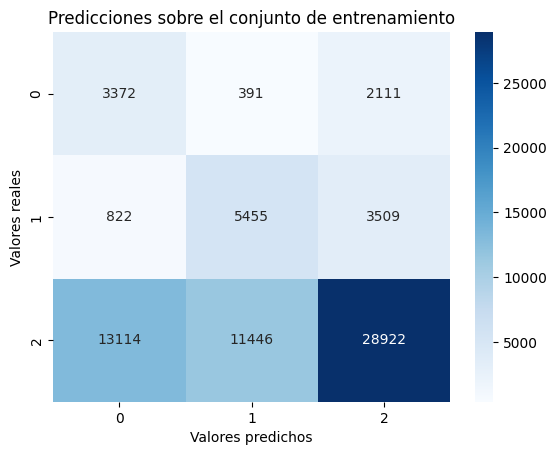

              precision    recall  f1-score   support

           0       0.19      0.57      0.29      5874
           1       0.32      0.56      0.40      9786
           2       0.84      0.54      0.66     53482

    accuracy                           0.55     69142
   macro avg       0.45      0.56      0.45     69142
weighted avg       0.71      0.55      0.59     69142

330/330 [==============================] - 0s 214us/step


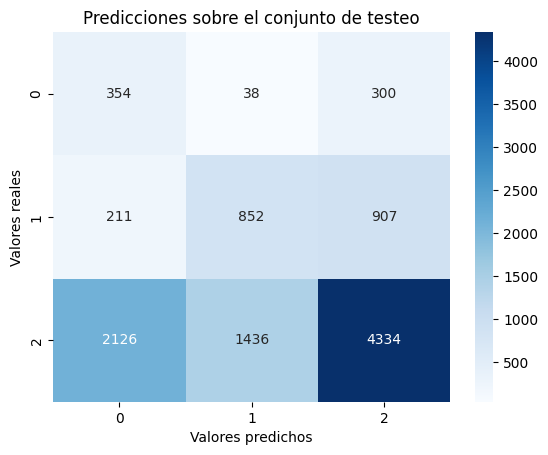

              precision    recall  f1-score   support

           0       0.13      0.51      0.21       692
           1       0.37      0.43      0.40      1970
           2       0.78      0.55      0.65      7896

    accuracy                           0.52     10558
   macro avg       0.43      0.50      0.42     10558
weighted avg       0.66      0.52      0.57     10558



In [92]:
predicciones_clasificacion(modelo_base, x_train_clasificacion_scaled, x_test_clasificacion_scaled)

Probamos ahora agregando una capa intermeda

In [93]:
modelo_capa_extra = keras.Sequential([
    keras.layers.Dense(cantidad_de_variables_predictoras, input_shape=(cantidad_de_variables_predictoras,),
                       activation='relu'),
    keras.layers.Dense(cantidad_de_posibles_respuestas, activation='softmax')
])

modelo_capa_extra.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 9)                 90        
                                                                 
 dense_14 (Dense)            (None, 3)                 30        
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [94]:
modelo_capa_extra.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
)

cant_epochs = 100

modelo_capa_extra.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=16, verbose=True,
                      workers=-1, use_multiprocessing=True)

Epoch 1/100
4322/4322 [==============================] - 1s 300us/step - loss: 0.9376
Epoch 2/100
4322/4322 [==============================] - 1s 295us/step - loss: 0.8941
Epoch 3/100
4322/4322 [==============================] - 1s 294us/step - loss: 0.8852
Epoch 4/100
4322/4322 [==============================] - 1s 295us/step - loss: 0.8792
Epoch 5/100
4322/4322 [==============================] - 1s 294us/step - loss: 0.8751
Epoch 6/100
4322/4322 [==============================] - 1s 294us/step - loss: 0.8729
Epoch 7/100
4322/4322 [==============================] - 1s 294us/step - loss: 0.8709
Epoch 8/100
4322/4322 [==============================] - 1s 293us/step - loss: 0.8695
Epoch 9/100
4322/4322 [==============================] - 1s 294us/step - loss: 0.8678
Epoch 10/100
4322/4322 [==============================] - 1s 295us/step - loss: 0.8663
Epoch 11/100
4322/4322 [==============================] - 1s 293us/step - loss: 0.8654
Epoch 12/100
4322/4322 [============================

2161/2161 [==============================] - 0s 208us/step


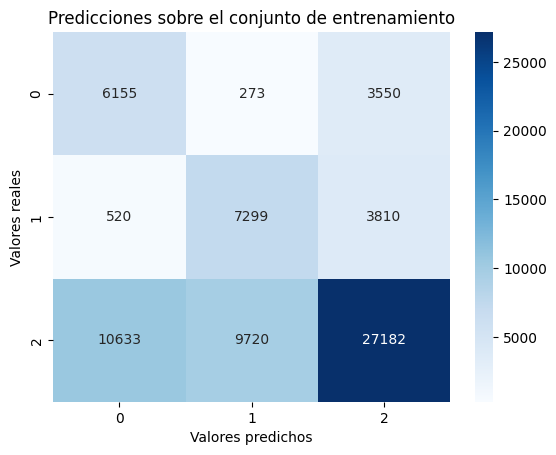

              precision    recall  f1-score   support

           0       0.36      0.62      0.45      9978
           1       0.42      0.63      0.50     11629
           2       0.79      0.57      0.66     47535

    accuracy                           0.59     69142
   macro avg       0.52      0.61      0.54     69142
weighted avg       0.66      0.59      0.61     69142

330/330 [==============================] - 0s 208us/step


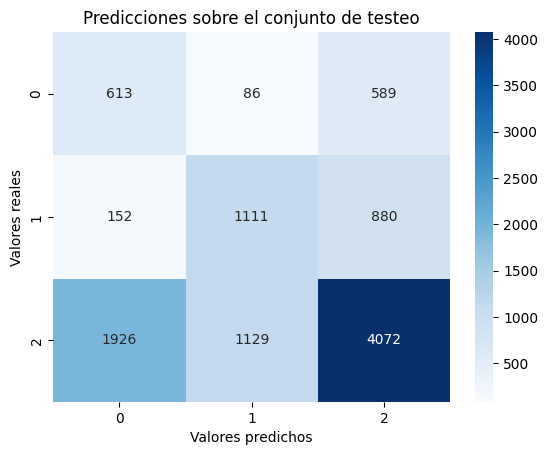

              precision    recall  f1-score   support

           0       0.23      0.48      0.31      1288
           1       0.48      0.52      0.50      2143
           2       0.73      0.57      0.64      7127

    accuracy                           0.55     10558
   macro avg       0.48      0.52      0.48     10558
weighted avg       0.62      0.55      0.57     10558



In [95]:
predicciones_clasificacion(modelo_capa_extra, x_train_clasificacion_scaled, x_test_clasificacion_scaled)

Optamos por agregar una capa intermedia de 12 neuronas con la función de activación reLU. Luego una capa de 6 neuronas con función tanh. Finalmente una capa de salida de 3 neuronas con la función de activación sigmoidea ya que se trata de un problema de clasificación.

In [96]:
modelo1 = keras.Sequential([
    keras.layers.Dense(cantidad_de_variables_predictoras, input_shape=(cantidad_de_variables_predictoras,),
                       activation='relu'),
    keras.layers.Dense(cantidad_de_variables_predictoras / 2, activation='tanh'),
    keras.layers.Dense(cantidad_de_posibles_respuestas, activation='softmax')
])

modelo1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 9)                 90        
                                                                 
 dense_16 (Dense)            (None, 4)                 40        
                                                                 
 dense_17 (Dense)            (None, 3)                 15        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [97]:
modelo1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
)

cant_epochs = 100

modelo1.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=16, verbose=True, workers=-1,
            use_multiprocessing=True)

Epoch 1/100
4322/4322 [==============================] - 2s 320us/step - loss: 0.9205
Epoch 2/100
4322/4322 [==============================] - 1s 317us/step - loss: 0.8806
Epoch 3/100
4322/4322 [==============================] - 1s 316us/step - loss: 0.8706
Epoch 4/100
4322/4322 [==============================] - 1s 316us/step - loss: 0.8666
Epoch 5/100
4322/4322 [==============================] - 1s 317us/step - loss: 0.8643
Epoch 6/100
4322/4322 [==============================] - 1s 316us/step - loss: 0.8626
Epoch 7/100
4322/4322 [==============================] - 1s 316us/step - loss: 0.8612
Epoch 8/100
4322/4322 [==============================] - 1s 317us/step - loss: 0.8592
Epoch 9/100
4322/4322 [==============================] - 1s 316us/step - loss: 0.8581
Epoch 10/100
4322/4322 [==============================] - 1s 317us/step - loss: 0.8570
Epoch 11/100
4322/4322 [==============================] - 1s 316us/step - loss: 0.8561
Epoch 12/100
4322/4322 [============================

Como optimizador decidimos utilizar Adam con un learning rate lo suficientemente bajo como para no realizar saltos demasiado grandes a la hora de converger.

2161/2161 [==============================] - 0s 210us/step


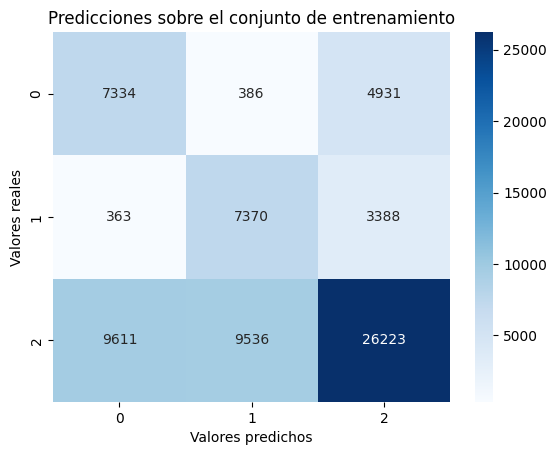

              precision    recall  f1-score   support

           0       0.42      0.58      0.49     12651
           1       0.43      0.66      0.52     11121
           2       0.76      0.58      0.66     45370

    accuracy                           0.59     69142
   macro avg       0.54      0.61      0.55     69142
weighted avg       0.64      0.59      0.60     69142

330/330 [==============================] - 0s 209us/step


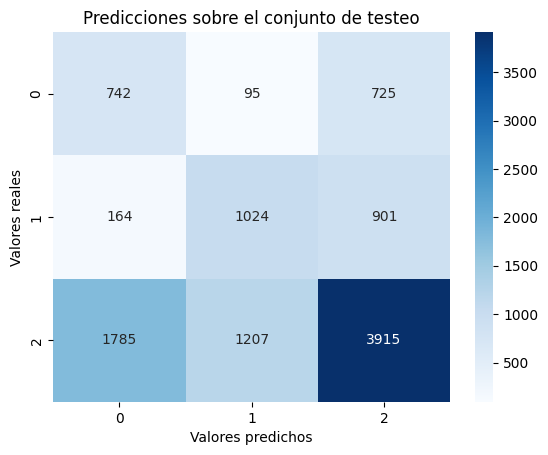

              precision    recall  f1-score   support

           0       0.28      0.48      0.35      1562
           1       0.44      0.49      0.46      2089
           2       0.71      0.57      0.63      6907

    accuracy                           0.54     10558
   macro avg       0.47      0.51      0.48     10558
weighted avg       0.59      0.54      0.55     10558



In [98]:
predicciones_clasificacion(modelo1, x_train_clasificacion_scaled, x_test_clasificacion_scaled)

Siguiente modelo

In [99]:
modelo2 = keras.Sequential([
    keras.layers.Dense(cantidad_de_variables_predictoras, input_shape=(cantidad_de_variables_predictoras,),
                       activation='relu'),
    keras.layers.Dense(cantidad_de_variables_predictoras * 2, activation='tanh'),
    keras.layers.Dense(cantidad_de_posibles_respuestas, activation='softmax')
])

modelo2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 9)                 90        
                                                                 
 dense_19 (Dense)            (None, 18)                180       
                                                                 
 dense_20 (Dense)            (None, 3)                 57        
                                                                 
Total params: 327
Trainable params: 327
Non-trainable params: 0
_________________________________________________________________


In [100]:
modelo2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
)

cant_epochs = 100

historia_entrenamiento_modelo = modelo2.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs,
                                            batch_size=16, verbose=True, use_multiprocessing=True)

Epoch 1/100
4322/4322 [==============================] - 2s 370us/step - loss: 0.9168
Epoch 2/100
4322/4322 [==============================] - 2s 367us/step - loss: 0.8779
Epoch 3/100
4322/4322 [==============================] - 2s 368us/step - loss: 0.8668
Epoch 4/100
4322/4322 [==============================] - 2s 369us/step - loss: 0.8591
Epoch 5/100
4322/4322 [==============================] - 2s 367us/step - loss: 0.8531
Epoch 6/100
4322/4322 [==============================] - 2s 366us/step - loss: 0.8496
Epoch 7/100
4322/4322 [==============================] - 2s 368us/step - loss: 0.8469
Epoch 8/100
4322/4322 [==============================] - 2s 373us/step - loss: 0.8448
Epoch 9/100
4322/4322 [==============================] - 2s 370us/step - loss: 0.8426
Epoch 10/100
4322/4322 [==============================] - 2s 367us/step - loss: 0.8405
Epoch 11/100
4322/4322 [==============================] - 2s 379us/step - loss: 0.8389
Epoch 12/100
4322/4322 [============================

2161/2161 [==============================] - 1s 225us/step


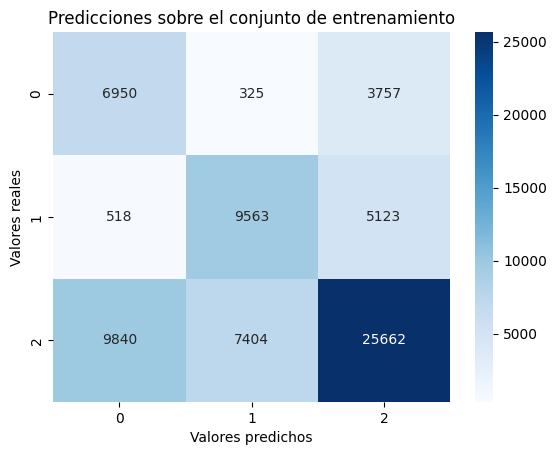

              precision    recall  f1-score   support

           0       0.40      0.63      0.49     11032
           1       0.55      0.63      0.59     15204
           2       0.74      0.60      0.66     42906

    accuracy                           0.61     69142
   macro avg       0.57      0.62      0.58     69142
weighted avg       0.65      0.61      0.62     69142

330/330 [==============================] - 0s 213us/step


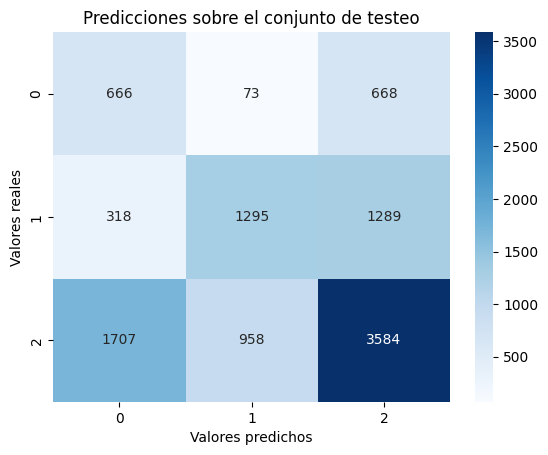

              precision    recall  f1-score   support

           0       0.25      0.47      0.33      1407
           1       0.56      0.45      0.50      2902
           2       0.65      0.57      0.61      6249

    accuracy                           0.53     10558
   macro avg       0.48      0.50      0.48     10558
weighted avg       0.57      0.53      0.54     10558



In [101]:
predicciones_clasificacion(modelo2, x_train_clasificacion_scaled, x_test_clasificacion_scaled)

Vemos que ampliar la cantidad de neuronas de la capa intermedia mejora las métricas del modelo

In [102]:
modelo3 = keras.Sequential([
    keras.layers.Dense(cantidad_de_variables_predictoras, input_shape=(cantidad_de_variables_predictoras,),
                       activation='relu'),
    keras.layers.Dense(cantidad_de_variables_predictoras * 4, activation='tanh'),
    keras.layers.Dense(cantidad_de_posibles_respuestas, activation='softmax')
])

modelo3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 9)                 90        
                                                                 
 dense_22 (Dense)            (None, 36)                360       
                                                                 
 dense_23 (Dense)            (None, 3)                 111       
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [103]:
modelo3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
)

cant_epochs = 100

modelo3.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=16, verbose=True, workers=-1,
            use_multiprocessing=True)

Epoch 1/100
4322/4322 [==============================] - 2s 371us/step - loss: 0.9048
Epoch 2/100
4322/4322 [==============================] - 2s 389us/step - loss: 0.8758
Epoch 3/100
4322/4322 [==============================] - 2s 380us/step - loss: 0.8656
Epoch 4/100
4322/4322 [==============================] - 2s 391us/step - loss: 0.8558
Epoch 5/100
4322/4322 [==============================] - 2s 374us/step - loss: 0.8490
Epoch 6/100
4322/4322 [==============================] - 2s 371us/step - loss: 0.8440
Epoch 7/100
4322/4322 [==============================] - 2s 368us/step - loss: 0.8414
Epoch 8/100
4322/4322 [==============================] - 2s 362us/step - loss: 0.8388
Epoch 9/100
4322/4322 [==============================] - 2s 356us/step - loss: 0.8368
Epoch 10/100
4322/4322 [==============================] - 2s 349us/step - loss: 0.8348
Epoch 11/100
4322/4322 [==============================] - 1s 347us/step - loss: 0.8342
Epoch 12/100
4322/4322 [============================

2161/2161 [==============================] - 0s 209us/step


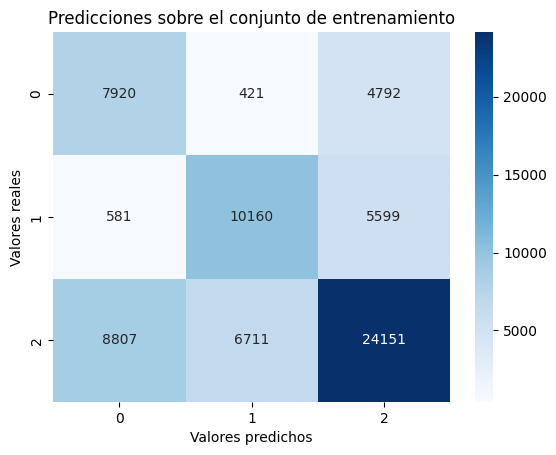

              precision    recall  f1-score   support

           0       0.46      0.60      0.52     13133
           1       0.59      0.62      0.60     16340
           2       0.70      0.61      0.65     39669

    accuracy                           0.61     69142
   macro avg       0.58      0.61      0.59     69142
weighted avg       0.63      0.61      0.62     69142

330/330 [==============================] - 0s 211us/step


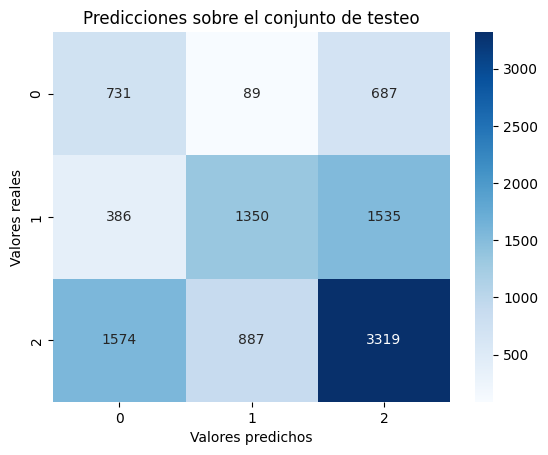

              precision    recall  f1-score   support

           0       0.27      0.49      0.35      1507
           1       0.58      0.41      0.48      3271
           2       0.60      0.57      0.59      5780

    accuracy                           0.51     10558
   macro avg       0.48      0.49      0.47     10558
weighted avg       0.55      0.51      0.52     10558



In [104]:
predicciones_clasificacion(modelo3, x_train_clasificacion_scaled, x_test_clasificacion_scaled)

No parecerían mejorar las métricas de test, por lo que seguir agregando neuronas a esta capa resultaría en un overfitteo. Veamos de todos modos que pasa si aumentamos la cantidad de la primera capa.

In [105]:
modelo4 = keras.Sequential([
    keras.layers.Dense(cantidad_de_variables_predictoras * 2, input_shape=(cantidad_de_variables_predictoras,),
                       activation='relu'),
    keras.layers.Dense(cantidad_de_variables_predictoras * 2, activation='tanh'),
    keras.layers.Dense(cantidad_de_posibles_respuestas, activation='softmax')
])

modelo4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 18)                180       
                                                                 
 dense_25 (Dense)            (None, 18)                342       
                                                                 
 dense_26 (Dense)            (None, 3)                 57        
                                                                 
Total params: 579
Trainable params: 579
Non-trainable params: 0
_________________________________________________________________


In [106]:
modelo4.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
)

cant_epochs = 100

historia_modelo = modelo4.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=16,
                              verbose=True, workers=-1, use_multiprocessing=True)

Epoch 1/100
4322/4322 [==============================] - 2s 377us/step - loss: 0.8940
Epoch 2/100
4322/4322 [==============================] - 2s 367us/step - loss: 0.8648
Epoch 3/100
4322/4322 [==============================] - 2s 367us/step - loss: 0.8552
Epoch 4/100
4322/4322 [==============================] - 2s 370us/step - loss: 0.8476
Epoch 5/100
4322/4322 [==============================] - 2s 367us/step - loss: 0.8414
Epoch 6/100
4322/4322 [==============================] - 2s 367us/step - loss: 0.8367
Epoch 7/100
4322/4322 [==============================] - 2s 367us/step - loss: 0.8334
Epoch 8/100
4322/4322 [==============================] - 2s 366us/step - loss: 0.8314
Epoch 9/100
4322/4322 [==============================] - 2s 367us/step - loss: 0.8288
Epoch 10/100
4322/4322 [==============================] - 2s 367us/step - loss: 0.8271
Epoch 11/100
4322/4322 [==============================] - 2s 366us/step - loss: 0.8257
Epoch 12/100
4322/4322 [============================

2161/2161 [==============================] - 0s 207us/step


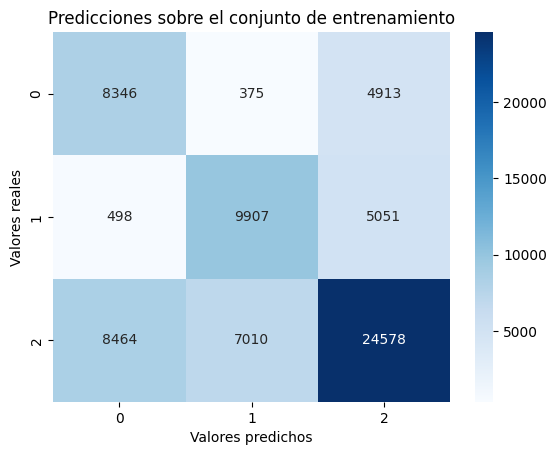

              precision    recall  f1-score   support

           0       0.48      0.61      0.54     13634
           1       0.57      0.64      0.61     15456
           2       0.71      0.61      0.66     40052

    accuracy                           0.62     69142
   macro avg       0.59      0.62      0.60     69142
weighted avg       0.64      0.62      0.62     69142

330/330 [==============================] - 0s 215us/step


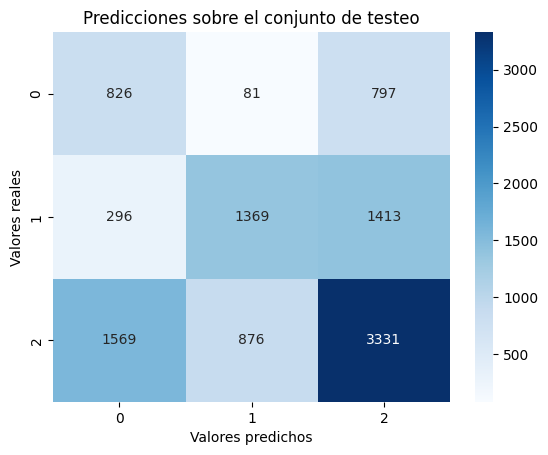

              precision    recall  f1-score   support

           0       0.31      0.48      0.38      1704
           1       0.59      0.44      0.51      3078
           2       0.60      0.58      0.59      5776

    accuracy                           0.52     10558
   macro avg       0.50      0.50      0.49     10558
weighted avg       0.55      0.52      0.53     10558



In [107]:
predicciones_clasificacion(modelo4, x_train_clasificacion_scaled, x_test_clasificacion_scaled)

Las métricas no mejoraron, nos quedamos con el modelo anterior. Veamos de todos modos si dicho modelo da mejores resultados con su ultima capa siendo de activación Sigmoid en vez de Softmax.

In [108]:
modelo3_sigmoid = keras.Sequential([
    keras.layers.Dense(cantidad_de_variables_predictoras, input_shape=(cantidad_de_variables_predictoras,),
                       activation='relu'),
    keras.layers.Dense(cantidad_de_variables_predictoras * 2, activation='tanh'),
    keras.layers.Dense(cantidad_de_posibles_respuestas, activation='sigmoid')
])

modelo3_sigmoid.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 9)                 90        
                                                                 
 dense_28 (Dense)            (None, 18)                180       
                                                                 
 dense_29 (Dense)            (None, 3)                 57        
                                                                 
Total params: 327
Trainable params: 327
Non-trainable params: 0
_________________________________________________________________


In [109]:
modelo3_sigmoid.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
)

cant_epochs = 100

modelo3_sigmoid.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=16, verbose=True,
                    workers=-1, use_multiprocessing=True)

Epoch 1/100
4322/4322 [==============================] - 2s 373us/step - loss: 0.8982
Epoch 2/100
4322/4322 [==============================] - 2s 369us/step - loss: 0.8690
Epoch 3/100
4322/4322 [==============================] - 2s 371us/step - loss: 0.8625
Epoch 4/100
4322/4322 [==============================] - 2s 366us/step - loss: 0.8577
Epoch 5/100
4322/4322 [==============================] - 2s 361us/step - loss: 0.8535
Epoch 6/100
4322/4322 [==============================] - 2s 381us/step - loss: 0.8499
Epoch 7/100
4322/4322 [==============================] - 2s 390us/step - loss: 0.8469
Epoch 8/100
4322/4322 [==============================] - 2s 395us/step - loss: 0.8444
Epoch 9/100
4322/4322 [==============================] - 2s 379us/step - loss: 0.8417
Epoch 10/100
4322/4322 [==============================] - 2s 374us/step - loss: 0.8400
Epoch 11/100
4322/4322 [==============================] - 2s 373us/step - loss: 0.8377
Epoch 12/100
4322/4322 [============================


KeyboardInterrupt



In [ ]:
predicciones_clasificacion(modelo3_sigmoid, x_train_clasificacion_scaled, x_test_clasificacion_scaled)

Vemos que softmax parece dar mejores resultados. Nos quedamos con el anterior modelo como el mejor.

In [ ]:
mejor_modelo = modelo2

Veamos si el modelo está convergiendo bien al mínimo o si está rebotando en puntos debido a un learning rate demasiado alto

In [ ]:
epochs = range(cant_epochs)
plt.plot(epochs, historia_entrenamiento_modelo.history['loss'], color='orange', label='loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Evolución del score de Loss con los Epochs")
plt.legend()

Parecería estar llegando al mínimo correctamente

#### Metricas finales

In [ ]:
predicciones_clasificacion(mejor_modelo, x_train_clasificacion_scaled, x_test_clasificacion_scaled)

Otro factor interesante que podriamos analizar es a que tipo de vivienda pertenece cada ammenity. Y si donde encontramos una ammenity en particular, encontramos consecuentemente otra. Por ejemplo, una casa con jardin y parrila y/o pileta.
De esta manera podriamos tratar de determinar el costo de cada ammenity o como afecta al precio.

## Ensambles de modelos

### Ensamble Voting

Un modelo de ensamble es un modelo de machine learning que combina las predicciones de multiples modelos.

Un ensamble de tipo Voting puede ser utilizado para problemas de clasificacion o problemas de regresion. En el caso de clasificacion, las predicciones de cada label son sumadas y el label con mayoria de votos es el predicho.

Hay dos approaches para la votacion de la mayoria en los problemas de clasificacion.

1. Hard Voting = Predice la clase con la mayor cantidad de votos de los modelos.
2. Soft Voting = Predice la clase con la mayor suma de probabilidad de los modelos.

Nosotros haremos un analisis con los 2 approaches y despues de ver las metricas, nos quedaremos con el que mejor se ajuste a nuestro problema.

##### Hard Voting

Droppeamos la columna place_l3 ya que estaba dandonos peores valores en las metricas.

In [131]:
x_train_cls = x_train.drop(axis=1, columns='place_l3')
x_test_cls = x_test.drop(axis=1, columns='place_l3')

Factorizamos el precio Bajo, Medio, Alto en los valores 0, 1, 2 para que los modelos funcionen correctamente

In [132]:
y_train_clasificacion_factorized = y_train_clasificacion.replace(['Bajo', 'Medio', 'Alto'],[0,1,2])
y_test_clasificacion_factorized = y_test_clasificacion.replace(['Bajo', 'Medio', 'Alto'],[0,1,2])

Realizamos una prediccion con el arbol de clasificacion

In [134]:
dtc = DecisionTreeClassifier(random_state=42)
dtc_model = dtc.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_dtc = dtc_model.predict(x_test_cls)

In [135]:
print(classification_report(y_test_clasificacion_factorized, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      2326
           1       0.70      0.71      0.70      5541
           2       0.62      0.62      0.62      2691

    accuracy                           0.67     10558
   macro avg       0.65      0.65      0.65     10558
weighted avg       0.67      0.67      0.67     10558



Realizamos una prediccion con el modelo de regresion logistica

In [136]:
lr = LogisticRegression()
lr_model = lr.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_lr = lr_model.predict(x_test_cls)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
print(classification_report(y_test_clasificacion_factorized, y_pred_lr))

              precision    recall  f1-score   support

           0       0.57      0.08      0.14      2326
           1       0.54      0.96      0.69      5541
           2       0.57      0.07      0.13      2691

    accuracy                           0.54     10558
   macro avg       0.56      0.37      0.32     10558
weighted avg       0.55      0.54      0.43     10558



Realizamos una prediccion con el modelo de naive bayes

In [138]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_gnb = gnb_model.predict(x_test_cls)

In [139]:
print(classification_report(y_test_clasificacion_factorized, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.54      0.20      0.30      2326
           1       0.55      0.80      0.65      5541
           2       0.40      0.25      0.30      2691

    accuracy                           0.53     10558
   macro avg       0.50      0.42      0.42     10558
weighted avg       0.51      0.53      0.49     10558



Realizamos una prediccion con el modelo clasificador de bosque aleatorio

In [140]:
rmf = RandomForestClassifier()
rmf_model = rmf.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_rmf = rmf_model.predict(x_test_cls)

In [141]:
print(classification_report(y_test_clasificacion_factorized, y_pred_rmf))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      2326
           1       0.72      0.83      0.77      5541
           2       0.75      0.62      0.68      2691

    accuracy                           0.74     10558
   macro avg       0.75      0.70      0.72     10558
weighted avg       0.74      0.74      0.73     10558



In [ ]:
Realizamos una prediccion con el modelo clasificador de KNN

In [142]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_knn = knn_model.predict(x_test_cls)

In [143]:
print(classification_report(y_test_clasificacion_factorized, y_pred_knn))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49      2326
           1       0.66      0.66      0.66      5541
           2       0.53      0.51      0.52      2691

    accuracy                           0.59     10558
   macro avg       0.56      0.56      0.56     10558
weighted avg       0.59      0.59      0.59     10558



In [ ]:
Realizamos una prediccion con el modelo linear SVC

In [144]:
svm = LinearSVC()
svm_model = svm.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_svm = svm_model.predict(x_test_cls)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [145]:
print(classification_report(y_test_clasificacion_factorized, y_pred_svm))

              precision    recall  f1-score   support

           0       0.44      0.39      0.41      2326
           1       0.56      0.75      0.64      5541
           2       0.50      0.20      0.28      2691

    accuracy                           0.53     10558
   macro avg       0.50      0.45      0.45     10558
weighted avg       0.52      0.53      0.50     10558



In [146]:
from sklearn.ensemble import VotingClassifier

# create a voting classifier with hard voting
voting_classifier_hard = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42)),
                  ('knn', KNeighborsClassifier(n_neighbors=1)),
                  ('rfc', RandomForestClassifier())], 
    voting='hard')

F1-score of the hard voting classifier: 0.6998
F1-score of the soft voting classifier: 0.7027


In [ ]:
# make predictions with the hard voting model
voting_classifier_hard.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_vch = voting_classifier_hard.predict(x_test_cls)

In [ ]:
# evaluate both models with the f-1 score
f1_vch = f1_score(y_test_clasificacion_factorized, y_pred_vch, average='micro')

In [ ]:
# print the f-1 scores
print('F1-score of the hard voting classifier: {}'.format(np.round(f1_vch,4)))

In [147]:
print(classification_report(y_test_clasificacion_factorized, y_pred_vch))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      2326
           1       0.71      0.78      0.75      5541
           2       0.74      0.58      0.65      2691

    accuracy                           0.70     10558
   macro avg       0.69      0.67      0.68     10558
weighted avg       0.70      0.70      0.70     10558



In [148]:
print(classification_report(y_test_clasificacion_factorized, y_pred_vcs))

              precision    recall  f1-score   support

           0       0.72      0.62      0.66      2326
           1       0.70      0.79      0.74      5541
           2       0.69      0.61      0.65      2691

    accuracy                           0.70     10558
   macro avg       0.70      0.67      0.68     10558
weighted avg       0.70      0.70      0.70     10558



##### Soft Voting

In [ ]:
# create a voting classifier with soft voting
voting_classifier_soft =  VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42)),
                  ('knn', KNeighborsClassifier(n_neighbors=1)),
                  ('rfc', RandomForestClassifier())], 
    voting='soft')

In [ ]:
# make predictions with the soft voting model
voting_classifier_soft.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_vcs = voting_classifier_soft.predict(x_test_cls)

In [ ]:
# evaluate both models with the f-1 score
f1_vcs = f1_score(y_test_clasificacion_factorized, y_pred_vcs, average='micro')

In [ ]:
# print the f-1 scores
print('F1-score of the soft voting classifier: {}'.format(np.round(f1_vcs,4)))

### Ensamble Stacking

In [128]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    print(model_names)
    print(results)
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )

    fig.update_layout(
        title='Performance of Different Models Using 5-Fold Cross-Validation',
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
        xaxis_title='Model',
        yaxis_title='Accuracy',
        showlegend=False)
    fig.show()

Vamos a utilizar KNN, SV, Random Forest y Regresion Lineal.

Tambien vamos a definir un regresor de Stacking del modulo de Scikit Learn’s, seteando los estimadores base como los modelos base y como estimador finaluna regresion lineal con 5 cross folds.

In [129]:
base_models = [
    ('KNN', KNeighborsRegressor()),
    ('SVR', SVR()),
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
]
stacked = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5)

Luego, vamos a fittear los modelos base y predecir la data de test que ya habiamos previamente separado en train (80%) y test (20%) para asi poder comparar los resultado con el ensamble regresor.

In [130]:
import time
from collections import defaultdict

#Guarda los scores de cada modelo
model_scores = defaultdict()

for name, model in base_models:
    start_time = time.time()
    model.fit(x_train, y_train_clasificacion_factorized)
    prediction = model.predict(x_test)
    end_time = time.time()

    r2 = model.score(x_test, y_test_clasificacion_factorized)
    rmse = mean_squared_error(y_test_clasificacion_factorized, prediction, squared=False)
    model_scores[name] = r2

    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")

start_time = time.time()
stacked.fit(x_train, y_train_clasificacion_factorized)
stacked_prediction = stacked.predict(x_test)
end_time = time.time()
stacked_r2 = stacked.score(x_test, y_test_clasificacion_factorized)
model_scores['Stacking'] = stacked_r2
stacked_rmse = mean_squared_error(y_test_clasificacion_factorized, stacked_prediction, squared=False)
print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------")


-------KNN-------
Coefficient of determination: -0.3612071452217258
Root Mean Squared Error: 0.8032421516317383
Computation Time: 0.13546395301818848
----------------------------------

-------SVR-------
Coefficient of determination: 0.04665440448523084
Root Mean Squared Error: 0.6722171108844599
Computation Time: 88.68035292625427
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.35217692807787504
Root Mean Squared Error: 0.5541311780642936
Computation Time: 21.57233166694641
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.19435102169937912
Root Mean Squared Error: 0.6179556552947814
Computation Time: 0.032366037368774414
----------------------------------



KeyboardInterrupt: 

El top 3 de los mejores modelos son:

    1. KNN
    2. Random Forest
    3. Ensamble de Stacking

Random Forest y el Ensamble estan a la par, mientras que KNN se separa por un muy pequeño porcentaje. El ensamble logra obtener grandes reusltados dada su naturaleza. El ensamble logra optimizar las mejores combincaiones lineales de los modelos permitiendonos obtener una mejor mezcla de diversidad de cada modelo y de cada predicción.
La unica contra que parece tener el ensamble es el tiempo computacional que tarda, es por ese motivo, y porque la metrica da levemente mejor, que en este caso, optamos por mencionar que KNN resulta superior.

## Conclusiones